
# [Bayesian Logical Data Analysis for the Physical Sciences; PHIL GREGORY](https://www.amazon.com/Bayesian-Logical-Analysis-Physical-Sciences/dp/0521150124/ref=sr_1_1?crid=9JVCADYDF4RN&keywords=bayesian+logical+data+analysis+for+the+physical+sciences&qid=1676495549&s=books&sprefix=bayesian+logical+data+analysis+for+the+physical+scieces%2Cstripbooks-intl-ship%2C168&sr=1-1)

In [1]:
import time
import torch
import numpy
import pandas
from math import comb
from scipy.stats import binom
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

%matplotlib inline

## Figure 10.2

In [2]:
# Figure 10.2
data_array_fig_10_2 = numpy.array([[10., 0.5, 14.],[20., 4.67, 3.], [30., 6.25, 25.], [40., 10.0, 2.], [50., 13.5, 3.], \
                          [60., 13.7, 22.], [70., 17.5, 5.], [80., 23.0, 2.]])

# Problem 1
data_array_prob_1 = numpy.array([[10, 0.387, 14],[20, 5.045, 3], [30, 7.299, 25], [40, 6.870, 2], [50, 16.659, 3], \
                          [60, 13.951, 22], [70, 16.781, 5], [80, 20.323, 2]])

In [3]:
df_fig_10_2 = pandas.DataFrame(data_array_fig_10_2, columns = ['xi','di_mean','ni'])
df_prob_1   = pandas.DataFrame(data_array_prob_1, columns = ['xi','di_mean','ni'])

print(df_fig_10_2)
print("***")
print(df_prob_1)

     xi  di_mean    ni
0  10.0     0.50  14.0
1  20.0     4.67   3.0
2  30.0     6.25  25.0
3  40.0    10.00   2.0
4  50.0    13.50   3.0
5  60.0    13.70  22.0
6  70.0    17.50   5.0
7  80.0    23.00   2.0
***
     xi  di_mean    ni
0  10.0    0.387  14.0
1  20.0    5.045   3.0
2  30.0    7.299  25.0
3  40.0    6.870   2.0
4  50.0   16.659   3.0
5  60.0   13.951  22.0
6  70.0   16.781   5.0
7  80.0   20.323   2.0


In [4]:
xi_data_fig_10_2    = df_fig_10_2["xi"].values # - 39.60
di_data_fig_10_2    = df_fig_10_2["di_mean"].values
ni_data_fig_10_2    = df_fig_10_2["ni"].values
sigma_data_fig_10_2 = 8.1/ni_data_fig_10_2

xi_data_prob_1      = df_prob_1["xi"].values 
di_data_prob_1      = df_prob_1["di_mean"].values
ni_data_prob_1      = df_prob_1["ni"].values
sigma_data_prob_1 = 4.0/ni_data_fig_10_2

In [19]:
def linear_model(intercept, slope, xi):
    """Given the values of intercept, slope, and input x, this function returns predicte y's!"""
    f = slope * xi + intercept
    
    return f

In [20]:
y_fig_10_2 = linear_model(intercept_fig_10_2, slope_fig_10_2, xi_data_fig_10_2)
y_prob_1   = linear_model(intercept_prob_1, slope_prob_1, xi_data_fig_10_2)

NameError: name 'intercept_prob_1' is not defined

NameError: name 'data_error_fig_10_2' is not defined

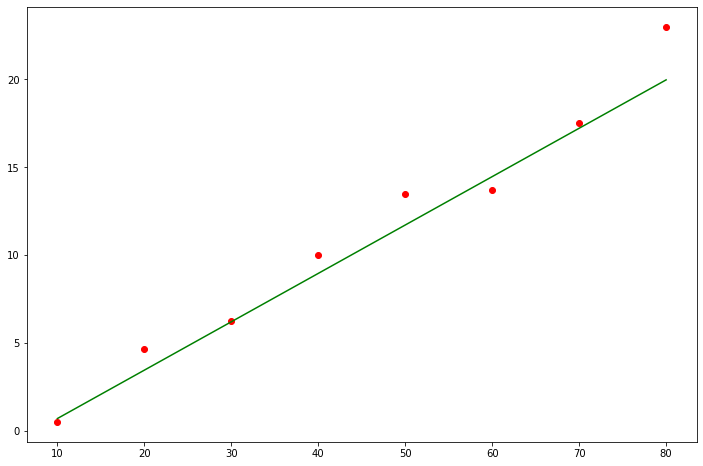

In [21]:
fig, ax = plt.subplots(1, 1, figsize = (12, 8))

ax.plot(xi_data_fig_10_2, di_data_fig_10_2, "ro")
ax.plot(xi_data_fig_10_2, y_fig_10_2, "g-")
ax.errorbar(xi_data_fig_10_2, di_data_fig_10_2, data_error_fig_10_2,  linestyle =" ", ecolor = "k")

### Exer plot ($\sigma^2 = 4.0$)

<ErrorbarContainer object of 3 artists>

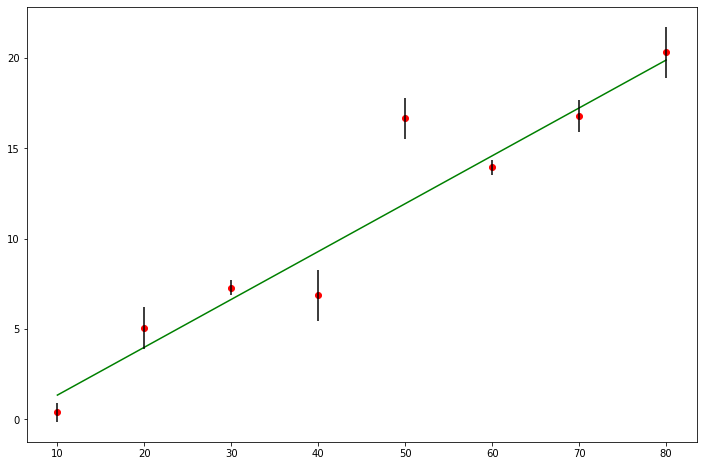

In [96]:
fig, ax = plt.subplots(1, 1, figsize = (12, 8))

ax.plot(xi_data_prob_1, di_data_prob_1, "ro")
ax.plot(xi_data_prob_1, y_prob_1, "g-")
ax.errorbar(xi_data_prob_1, di_data_prob_1, data_error_prob_1,  linestyle =" ", ecolor = "k")

## Joint Credible Region for the slope and intercept

In [168]:
def polar_coordinate(theta, estmiated_A1, estimated_A2, delta_chi):
    """This function is based on eqution 10.80! We try to map the radius in a polar coordinate system 
    by running theta from -180.1 to 180.1 (360 degree). As explained by the book radius is treated as
    unknown here! Next, as stated in the book we convert back from polar coordinate to Cartesian system."""
    
    radius = numpy.sqrt(delta_chi/(9.383 * numpy.cos(theta * 3.14/180.0)**2 + \
                                   371.6 * numpy.sin(theta * 3.14/180.0) * \
                              numpy.cos(theta * 3.14/180.0) + 371.6 * numpy.sin(theta * 3.14/180.0) * \
                              numpy.cos(theta * 3.14/180.0) + 18802 * numpy.sin(theta * 3.14/180.0)**2))
    
    delta_a1 = radius * numpy.cos(theta * 3.14/180.0)
    delta_a2 = radius * numpy.sin(theta * 3.14/180.0)
    
    A1 = estmiated_A1 + delta_a1
    A2 = estimated_A2 + delta_a2
    
    return A1, A2

In [169]:
theta   = numpy.linspace(-180.1, 180.1, 10000)

a1_fig_10_4_95_4, a2_fig_10_4_95_4 = polar_coordinate(theta, intercept_fig_10_2.item(), \
                                                      slope_fig_10_2.item(), delta_chi = 6.17)
a1_fig_10_4_68_3, a2_fig_10_4_68_3 = polar_coordinate(theta, intercept_fig_10_2.item(), \
                                                      slope_fig_10_2.item(), delta_chi = 2.3)

a1_prob_1_95_4, a2_prob_1_95_4 = polar_coordinate(theta, intercept_prob_1.item(), \
                                                  slope_prob_1.item(), delta_chi = 6.17)
a1_prob_1_68_3, a2_prob_1_68_3 = polar_coordinate(theta, intercept_prob_1.item(), \
                                                  slope_prob_1.item(), delta_chi = 2.3)

### Fig 10.4 (part "a"; black colour, table 10.1) and excersise two (red colour, table 10.3)

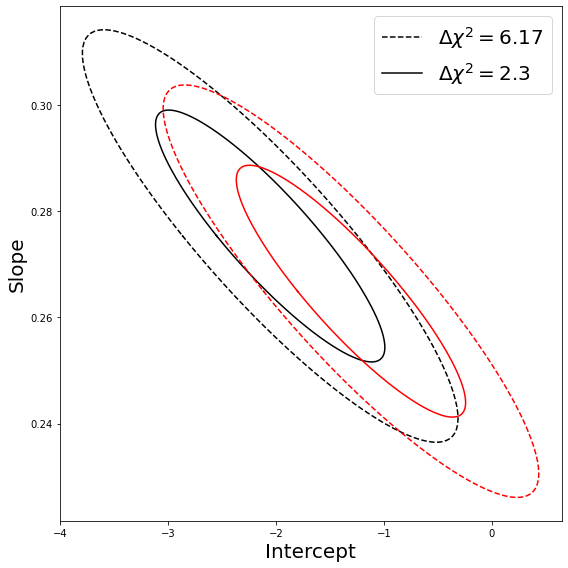

In [170]:
fig, ax = plt.subplots(1, 1, figsize = (8, 8), sharey = True)

ax.plot(a1_fig_10_4_95_4, a2_fig_10_4_95_4, "k--")
ax.plot(a1_fig_10_4_68_3, a2_fig_10_4_68_3, "k-")

ax.plot(a1_prob_1_95_4, a2_prob_1_95_4, "r--")
ax.plot(a1_prob_1_68_3, a2_prob_1_68_3, "r-")

ax.legend(["$\Delta\chi^2 = 6.17$", "$\Delta\chi^2 = 2.3$"], fontsize = 20)

ax.set_ylabel("Slope", fontsize = 20)
ax.set_xlabel("Intercept", fontsize = 20)

ax.set_xlabel("Intercept", fontsize = 20)
plt.tight_layout()

### Problem 3; page 284

In [5]:
data_array_table_10_4 = numpy.array([[-7.0, 53.8], [-7.0, 53.3], [-7.0, 54.8], [-7.0, 54.6], [-7.0, 53.7], \
                                     [-7.0, 55.2], [-7.0, 55.7], [-7.0, 54.1], [-6.0, 63.8], [-6.0, 64.2], \
                                     [-6.0, 66.9], [-6.0, 67.2], [-6.0, 65.4], [-6.0, 67.3], [-5.0, 71.8], \
                                     [-5.0, 73.2], [-5.0, 75.6], [-5.0, 76.2], [-5.0, 72.7], [-4.0, 79.4], \
                                     [-4.0, 81.1], [-4.0, 85.2], [-4.0, 83.0], [-4.0, 84.1], [-4.0, 82.8], \
                                     [-3.0, 90.3], [-3.0, 84.2], [-3.0, 88.3], [-3.0, 86.0], [-2.0, 93.2], \
                                     [-2.0, 97.4], [-2.0, 98.3], [-1.0, 102.8], [-1.0, 96.9], [-1.0, 98.2], \
                                     [0.0, 98.9], [0.0, 96.1], [0.0, 99.6], [0.0, 91.4], [1.0, 101.1], \
                                     [1.0, 94.6], [1.0, 95.9], [2.0, 92.3], [2.0, 96.6], [2.0, 98.5], \
                                     [3.0, 93.6], [3.0, 86.2], [3.0, 87.9], [3.0, 89.5], [4.0, 74.8], \
                                     [4.0, 82.3], [4.0, 76.9], [4.0, 81.2], [5.0, 73.6], [5.0, 65.4], \
                                     [5.0, 67.1], [6.0, 60.2], [6.0, 54.9], [6.0, 50.8], [7.0, 44.7], \
                                     [7.0, 38.5]])


In [6]:
combined_table_10_4 = numpy.array([[-7.0, 53.8], [-7.0, 53.3], [-7.0, 54.8], [-7.0, 54.6], [-7.0, 53.7], \
                                     [-7.0, 55.2], [-7.0, 55.7], [-7.0, 54.1], [-6.0, 63.8], [-6.0, 64.2], \
                                     [-6.0, 66.9], [-6.0, 67.2], [-6.0, 65.4], [-6.0, 67.3], [-5.0, 71.8], \
                                     [-5.0, 73.2], [-5.0, 75.6], [-5.0, 76.2], [-5.0, 72.7], [-4.0, 79.4], \
                                     [-4.0, 81.1], [-4.0, 85.2], [-4.0, 83.0], [-4.0, 84.1], [-4.0, 82.8], \
                                     [-3.0, 90.3], [-3.0, 84.2], [-3.0, 88.3], [-3.0, 86.0], [-3.0, 93.2], \
                                     [-3.0, 97.4], [-1.0, 98.3], [-1.0, 102.8], [-1.0, 96.9], [-1.0, 98.2], \
                                     [-1.0, 98.9], [0.0, 96.1], [0.0, 99.6], [0.0, 91.4], [0.0, 101.1], \
                                     [0.0, 94.6], [2.0, 95.9], [2.0, 92.3], [2.0, 96.6], [2.0, 98.5], \
                                     [2.0, 93.6], [3.0, 86.2], [3.0, 87.9], [3.0, 89.5], [3.0, 74.8], \
                                     [3.0, 82.3], [5.0, 76.9], [5.0, 81.2], [5.0, 73.6], [5.0, 65.4], \
                                     [5.0, 67.1], [7.0, 60.2], [7.0, 54.9], [7.0, 50.8], [7.0, 44.7], \
                                     [7.0, 38.5]])


In [7]:
combined_df_prob_3 = pandas.DataFrame(combined_table_10_4, columns = ['layer','pressure'])

print(combined_df_prob_3)

    layer  pressure
0    -7.0      53.8
1    -7.0      53.3
2    -7.0      54.8
3    -7.0      54.6
4    -7.0      53.7
..    ...       ...
56    7.0      60.2
57    7.0      54.9
58    7.0      50.8
59    7.0      44.7
60    7.0      38.5

[61 rows x 2 columns]


### Part a
In this part we take advantage of the central limit theorem (CLT). We calculate mean and std of each group of layers and put them in separate columns.

In [8]:
table_10_4_combined_averaged = pandas.DataFrame()

table_10_4_combined_averaged["layer"]         = combined_df_prob_3.groupby(['layer']).\
                                                mean().index
table_10_4_combined_averaged["pressure_mean"] = combined_df_prob_3.groupby(['layer']).\
                                                    mean().reset_index()["pressure"]
table_10_4_combined_averaged["pressure_std"]  = combined_df_prob_3.groupby(['layer']).\
                                                    std().reset_index()["pressure"]
table_10_4_combined_averaged["count"]         = combined_df_prob_3.groupby(['layer']).\
                                                    count().reset_index()["pressure"]

# table_10_4_combined_averaged = table_10_4_combined_averaged.drop(columns = ['averaged_pressure'])

table_10_4_combined_averaged 

,layer,pressure_mean,pressure_std,count
0,-7.0,54.40,0.817662,8
1,-6.0,65.80,1.558204,6
2,-5.0,73.90,1.905256,5
3,-4.0,82.60,2.083267,6
4,-3.0,89.90,4.848917,6
5,-1.0,99.02,2.235397,5
6,0.0,96.56,3.890116,5
7,2.0,95.38,2.457031,5
8,3.0,84.14,5.867964,5
9,5.0,72.84,6.619139,5


### Data preparation

In [9]:
xi_data_prob_3  = table_10_4_combined_averaged["layer"].values 
di_data_prob_3  = table_10_4_combined_averaged["pressure_mean"].values
ni_data_prob_3  = table_10_4_combined_averaged["count"].values
sig_data_prob_3 = table_10_4_combined_averaged["pressure_std"].values ** 2 # Note this is variance!

### layer-pressure plot (plus data errors)

<ErrorbarContainer object of 3 artists>

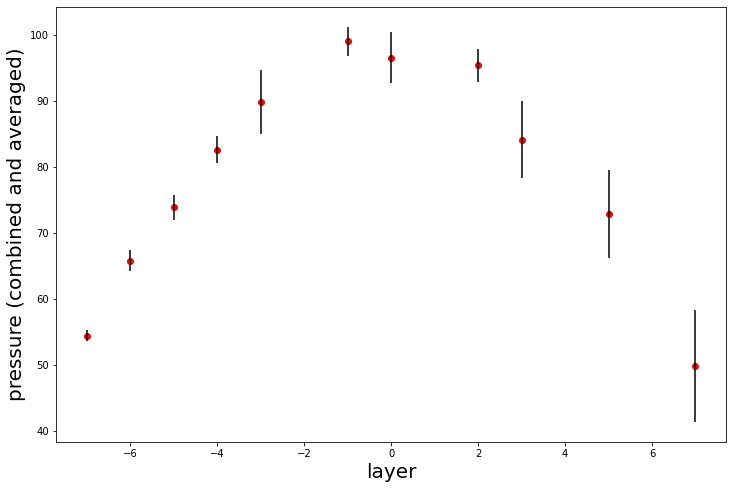

In [10]:
fig, ax = plt.subplots(1, 1, figsize = (12, 8))

ax.plot(table_10_4_combined_averaged["layer"], table_10_4_combined_averaged["pressure_mean"], "ro")

ax.set_ylabel("pressure (combined and averaged)", fontsize = 20)
ax.set_xlabel("layer", fontsize = 20)
ax.errorbar(table_10_4_combined_averaged["layer"], table_10_4_combined_averaged["pressure_mean"], \
            table_10_4_combined_averaged["pressure_std"],  linestyle =" ", ecolor = "k")

In [11]:
def bayesian_linear_regression(xi, yi, sigma, model_type):
    
    # Building "inverse data covariance matrix" E^(-1)
    E_matrix         = torch.diag(torch.from_numpy(sigma)).type(torch.float32)
    E_matrix_inverse = torch.inverse(E_matrix)
    # Building "Basis matrix" G
    G_basis_one   = torch.ones(yi.shape[0]).reshape(yi.shape[0], 1)
    G_basis_two   = torch.from_numpy(xi).type(torch.float32).reshape(yi.shape[0], 1)
    G_basis_three = torch.from_numpy(xi**2).type(torch.float32).reshape(yi.shape[0], 1)
    G_basis_four  = torch.from_numpy(xi**3).type(torch.float32).reshape(yi.shape[0], 1)

    if model_type == "linear":
        G_basis   = torch.cat((G_basis_one, G_basis_two), 1)
    elif model_type == "quadratic":
        G_basis   = torch.cat((G_basis_one, G_basis_two, G_basis_three), 1)
    elif model_type == "cubic":
        G_basis   = torch.cat((G_basis_one, G_basis_two, G_basis_three, G_basis_four), 1)
    else:
        raise ValueError("Oops! Given model does not exist! Try one of 'linear', 'quadratic', or 'cubic'!")


    # Buidling transpose of the Basis matrix (G^[-1])
    G_basis_transpose = torch.transpose(G_basis, 1, 0)
    
    # Building "Data matrix" D
    D_matrix = torch.from_numpy(yi).type(torch.float32).reshape(yi.shape[0], 1)

    # Building "PSI matrix" PSI (capital PSI) (eq. 10.52 and 10.53)
    psi = G_basis_transpose @ E_matrix_inverse @ G_basis

    # Buidling inverse of the PSI matrix (Psi^[-1]) (eq. 10.53, 10.103)
    # Note the squre root down in return (eq.10.104 and 10.105)
    psi_inverse = torch.inverse(psi) # Note that "sigma" is included in "E_matrix_inverse" above.

    # For parameter variation/error estimation we need the square root of the elements
    # on the main diagoanl of the "PSI inverse" matrix (eq. 10.103, 10.104, 10.105).
    psi_iverse_main_diagonal_elements = torch.sqrt(torch.diagonal(psi_inverse, 0))
    
    # Building "R matrix" (eq. 10.54)
    # Note that "sigma" is included in "E_matrix_inverse" above.
    R = G_basis_transpose @ E_matrix_inverse @ D_matrix
    
    # Finally, calculating the "Amplitude" matrix, A 
    A_amplitude = psi_inverse @ R
    
    # Building weights for shifting the origin (e.g. 10.111)
    # Note that "sigma" is included in "E_matrix_inverse" above.
    weight      = G_basis_transpose[0] @ E_matrix_inverse
    numerator   = (weight * xi).sum() # note the * multipication!
    denominator = weight.sum()
    shift_value = numerator/denominator

    return A_amplitude, psi_inverse, shift_value

In [12]:
(intercept_fig_10_2, slope_fig_10_2), parameter_var_covar_matrix_fig_10_2, shift_value_fig_10_2 = \
                                bayesian_linear_regression(xi_data_fig_10_2, di_data_fig_10_2, sigma = \
                                sigma_data_fig_10_2, model_type = "linear")

In [13]:
(intercept_prob_3_quad, beta_1_prob_3_quad, beta_2_prob_3_quad), \
                                parameter_var_covar_matrix_prob_3_quad, shift_value_prob_3_quad = \
                                bayesian_linear_regression(xi_data_prob_3, di_data_prob_3, \
                                sigma = sig_data_prob_3, model_type = "quadratic")

In [14]:
(intercept_prob_3_cubic, beta_1_prob_3_cubic, beta_2_prob_3_cubic, beta_3_prob_3_cubic), \
                                parameter_var_covar_matrix_prob_3_cubic, shift_value_prob_3_cubic = \
                                bayesian_linear_regression(xi_data_prob_3, di_data_prob_3, \
                                sigma = sig_data_prob_3, model_type = "cubic")

## Model prediction

In [15]:
def model_prediction(xi, model_par):
    """Given model parameters and input x this function returns predicted y's!
    model (string): one of "linear", "quadratic", or "cubic".
    model_par [list]: a list of parameters of the selected model.
    """
    model_par_size = len(model_par)
    if model_par_size == 2:   # linear model
        f = model_par[1] * xi + model_par[0]
    elif model_par_size == 3: # quadratic model
        f = model_par[1] * xi + model_par[2] * xi**2 + model_par[0]
    elif model_par_size == 4: # cubic model
        f = model_par[1] * xi + model_par[2] * xi**2 + model_par[3] * xi**3 + model_par[0]
    else:
        raise ValueError("Number of parameters does not match the selected model!")

    return f

In [16]:
y_linear    = model_prediction(xi_data_prob_3, [intercept_fig_10_2, slope_fig_10_2])
y_quadratic = model_prediction(xi_data_prob_3, [intercept_prob_3_quad, beta_1_prob_3_quad, beta_2_prob_3_quad])
y_cubic     = model_prediction(xi_data_prob_3, [intercept_prob_3_cubic, beta_1_prob_3_cubic, \
                                                beta_2_prob_3_cubic, beta_3_prob_3_cubic])

## Model visualisation

### Linear

Text(0.5, 0, 'layer')

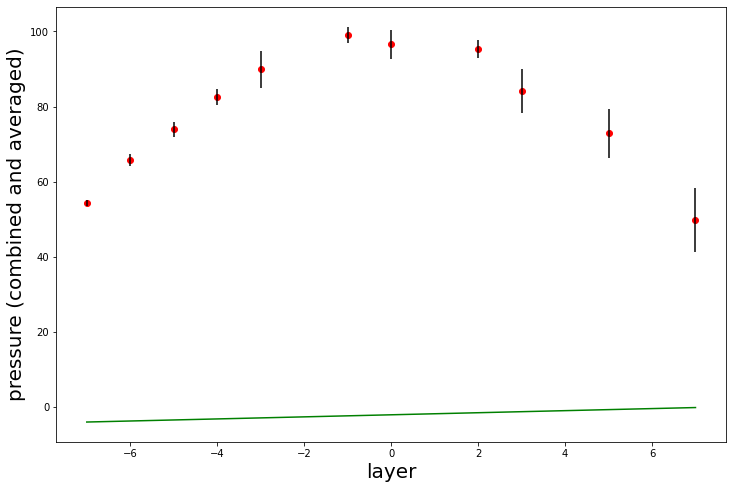

In [17]:
fig, ax = plt.subplots(1, 1, figsize = (12, 8))

ax.plot(xi_data_prob_3, di_data_prob_3, "ro")
ax.plot(xi_data_prob_3, y_linear, "g-")
ax.errorbar(xi_data_prob_3, di_data_prob_3, table_10_4_combined_averaged["pressure_std"], \
            linestyle =" ", ecolor = "k")

ax.set_ylabel("pressure (combined and averaged)", fontsize = 20)
ax.set_xlabel("layer", fontsize = 20)

### Quadratic vs. Cubic 

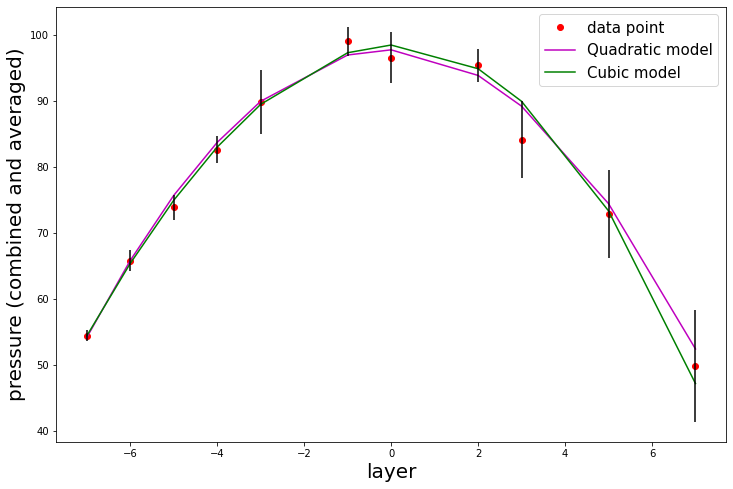

In [205]:
fig, ax = plt.subplots(1, 1, figsize = (12, 8))

ax.plot(xi_data_prob_3, di_data_prob_3, "ro")
ax.plot(xi_data_prob_3, y_quadratic, "m-")
ax.plot(xi_data_prob_3, y_cubic, "g-")

ax.errorbar(xi_data_prob_3, di_data_prob_3, table_10_4_combined_averaged["pressure_std"], \
            linestyle =" ", ecolor = "k")

# ax.errorbar(xi_data_prob_3, y_quadratic, table_10_4_combined_averaged["pressure_std"], \
#             linestyle =" ", ecolor = "m")

ax.set_ylabel("pressure (combined and averaged)", fontsize = 20)
ax.set_xlabel("layer", fontsize = 20)

ax.legend(["data point", "Quadratic model", "Cubic model"], fontsize = 15)

## Part d: Odds ratio
Note that here we assume mean and variance of the distribution of our data are known according to CLT in part ___a___ of this problem.

$\large O_{12} = \large\frac{P(M_1|I)P(D|M_1, I)}{P(M_2|I)P(D|M_2, I)} \equiv \large\frac{P(M_1|I)}{P(M_2|I)} B_{12}$

where final odds ratio of the cubic model to the quadratic model is as follows

$\large O_{12} = \large\frac{P(A_4|M_2, I)P(D|A_4, A_3, A_2, A_1, M_2, I)}{P(D|A_3, A_2, A_1, M_1, I)}$

where 

$P(A_4|M_2, I) = \large\frac{1}{\Delta A_4} \small = 1$  

then

$\large O_{12} = \large\frac{P(D|A_4, A_3, A_2, A_1, M_2, I)}{P(D|A_3, A_2, A_1, M_1, I)}$.

Next, we use eq. 3.18 to find the ___probability___ of each model as follows

$P(M_i|D, I) = \large\frac{\large O_{i1}}{\sum_{i=1}^{N_{mod}} O_{i1}}$

Using the code below (___likelihood___) one can find the likelihood value for each model!

In [241]:
def likelihood(observed_data, predicted_data, variance):
    """This function takes in predicted data (f_i or y_bar) and observed data (d_i or y_i) and 
    according to equation 9.12 (line two) finds the likelihood D."""

    var_term           = torch.prod(torch.sqrt(variance)**(-1))

    pi_term            = (6.28)**(-1 * (observed_data.size()[0]/2))
    
    inside_exponential = -1 * sum(((observed_data - predicted_data)**2)/(2*variance))
    exponential_term   = torch.exp(inside_exponential)
    likelihood         = var_term * pi_term * exponential_term # According to line two of eqution 9.12
    
    return likelihood

In [242]:
di_data_prob_3_tensor  = torch.from_numpy(di_data_prob_3)
sig_data_prob_3_tensor = torch.from_numpy(sig_data_prob_3)

quadratic_likelihood   = likelihood(di_data_prob_3_tensor, y_quadratic, sig_data_prob_3_tensor)
cubic_likelihood       = likelihood(di_data_prob_3_tensor, y_cubic, sig_data_prob_3_tensor)

Note that the two likelihoods above are maximum likelihoods! In other words, the set of parameters that we found above maximized the likelihood of the observed data (i.e. pressure data). That is how Bayesian regression works!

In [262]:
ods_ratio_cubic_to_quadratic = cubic_likelihood/quadratic_likelihood
ods_ratio_cubic_to_quadratic

tensor(1.7338, dtype=torch.float64)

## Probability of M2 and M1 (according to equations 3.18 and 3.19)

In [261]:
p_cubic     = ods_ratio_cubic_to_quadratic/(1 + ods_ratio_cubic_to_quadratic)
P_quadratic = 1 - p_cubic

print("probability of quadratic model ---> ", P_quadratic.item())

print("probability of cubic model ---> ", p_cubic.item())


probability of quadratic model --->  0.5118178747502753
probability of cubic model --->  0.48818212524972476


## Likelihood as a function of its parameter(s)

It would be nice to make a series of plots of the likelihood function to check its dependence on its parameters A1, A2, A3, and A4. (Similar to above we assume the mean and variance of the distribution are known according to CLT.) One has to consider all the possible combinations of these parameters and make a plot for every single one of them. For instance, to see the bahaviour of likelihood on A1 one has to fix the values of the parameters A2, A3, and A4 (for cubic model) and make one plot for the entire range of A1. Then, fix the values of A2, A3, and A4 again with a new set of values and make another plot for the entire range of A1. This process needs to continue to cover the entire range of A2, A3, and A4 which does not make sense! Howevre, we plot one example below.

In [64]:
def likelihood_dependence(observed_data, predictor, variance, parameter_list, model):
    """This function takes in the observed data and the set of variance for each point (known variance) and
    the acceptable values of A1 along with two fixed values (i.e. know values) for A2, and A3. The output 
    will be the likelihood of observed data as a function of the A1 parameter. See figure 3.4. and eq. 3.44.
    or 9.12 for likelihood function (or other equations)."""
    
    likelihood_list    = []

    var_term           = torch.prod(torch.sqrt(variance)**(-1))

    pi_term            = (6.28)**(-1 * (observed_data.size()[0]/2))
    
    if model   == "quadratic":
        for A1_counter in parameter_list[0]:
        
            predicted_data     = parameter_list[2] * predictor**2 + parameter_list[1] * \
                                 predictor + A1_counter

            inside_exponential = -1 * sum(((observed_data - predicted_data)**2)/(2*variance))
            exponential_term   = torch.exp(inside_exponential)

            likelihood         = var_term * pi_term * exponential_term
            likelihood_list.append(likelihood)
    
    elif model == "cubic":
        for A1_counter in parameter_list[0]:
            predicted_data     = parameter_list[3] * predictor**3 + parameter_list[2] * \
                            predictor**2 + parameter_list[1] * predictor + A1_counter

            inside_exponential = -1 * sum(((observed_data - predicted_data)**2)/(2*variance))

            exponential_term   = torch.exp(inside_exponential)

            likelihood         = var_term * pi_term * exponential_term
            likelihood_list.append(likelihood)
            
    return likelihood_list

In [89]:
A1_range = torch.linspace(92, 104, 5000)
xi_data_prob_3_tensor    = torch.from_numpy(xi_data_prob_3)
sig_data_prob_3_tensor   = torch.from_numpy(sig_data_prob_3)

list_of_model_param_quad  = [A1_range, beta_1_prob_3_quad, beta_2_prob_3_quad]
list_of_model_param_cubic = [A1_range, beta_1_prob_3_cubic, beta_2_prob_3_cubic, beta_3_prob_3_cubic]

likelihood_dependence_on_A1_quadratic = likelihood_dependence(di_data_prob_3_tensor, xi_data_prob_3_tensor, \
                                        sig_data_prob_3_tensor, list_of_model_param_quad, model = "quadratic")

likelihood_dependence_on_A1_cubic     = likelihood_dependence(di_data_prob_3_tensor, xi_data_prob_3_tensor, \
                                        sig_data_prob_3_tensor, list_of_model_param_cubic, model = "cubic")


## Plotting data likelihood (D) as a function of A1 (log scale)
In the plot below you can see the likelihood P.D.F as function of A1. Note that all the other parameters of our quadratic (mu = X(bar), sigma (bar), A2 = -0.1243, A3 = -0.9077) and cubic (mu = X(bar), sigma (bar), A2 = 0.2100, A3 = -0.9736, A4 = -0.0148) are known and fixed.

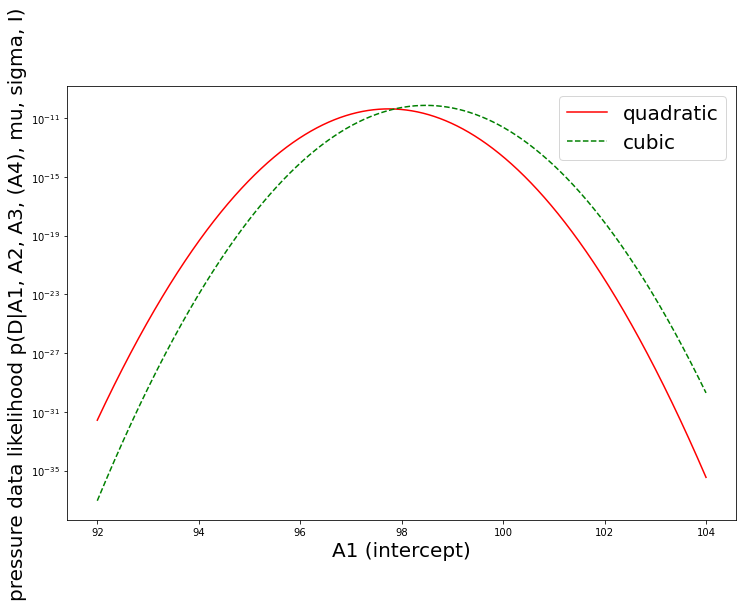

In [90]:
fig, ax = plt.subplots(1, 1, figsize = (12, 8))

ax.plot(A1_range, likelihood_dependence_on_A1_quadratic, "r-")
ax.plot(A1_range, likelihood_dependence_on_A1_cubic, "g--")

ax.set_ylabel("pressure data likelihood p(D|A1, A2, A3, (A4), mu, sigma, I)", fontsize = 20)
ax.set_xlabel("A1 (intercept)", fontsize = 20)


plt.yscale("log")
plt.legend(["quadratic", "cubic"], fontsize = 20)



### Finding the indec of the A1 value that maximizes likelihood function

In [94]:
print(numpy.argmax(likelihood_dependence_on_A1_quadratic))
print(A1_range[numpy.argmax(likelihood_dependence_on_A1_quadratic)])


2394
tensor(97.7467)


In [92]:
print(numpy.argmax(likelihood_dependence_on_A1_cubic))
print(A1_range[numpy.argmax(likelihood_dependence_on_A1_cubic)])

2698
tensor(98.4765)


## Visualising A1 prior distribution using Jefferys and uniform priors (fig. 3.4)

In [33]:
def parameter_prior(parameter_range, steps, prior):
    """This function is for the purpose of comparison between two prior distributions; 'unifor' and 'Jeffrys' 
    (fig 3.4.).This function takes the range of a parameter (e.g. A1/intercept) along with its resolution 
    in the form of number of steps. Also, user must indicate which of the two priors 'unifor' or 'Jeffrys' 
    must be used."""
    
    parameter_max    = parameter_range.max()

    parameter_min    = parameter_range.min()
    
    ln_parameter_max_over_parameter_min = torch.log(parameter_max/parameter_min)
    parameter_probability_list = []

    for parameter_value in parameter_range: # this for loop plays the role of an integral
        if prior == "uniform":
            parameter_probability_uniform = (1/(parameter_max - parameter_min))
            parameter_probability_list.append(parameter_probability_uniform)
        elif prior == "jeffrys":
            denominator = parameter_value * ln_parameter_max_over_parameter_min
            parameter_probability_jeffrys = (1/(denominator))
            parameter_probability_list.append(parameter_probability_jeffrys)

    return parameter_probability_list

In [29]:
number_of_steps  = 5000

A1_range         = torch.linspace(0.1, 100.1, number_of_steps)

A1_prior_unifor  = parameter_prior(A1_range, number_of_steps, "uniform")
A1_prior_jeffrys = parameter_prior(A1_range, number_of_steps,"jeffrys")

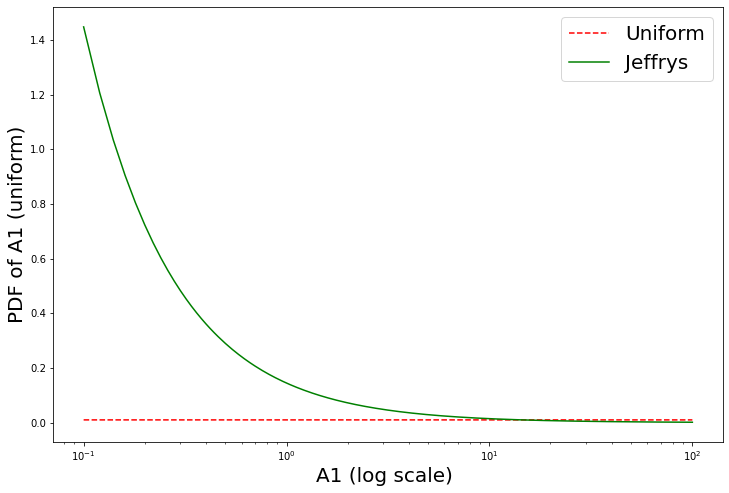

In [32]:
fig, ax = plt.subplots(1, 1, figsize = (12, 8))

ax.plot(A1_range, A1_prior_unifor, "r--")
ax.plot(A1_range, A1_prior_jeffrys, "g-")

ax.set_ylabel("PDF of A1 (uniform)", fontsize = 20)
ax.set_xlabel("A1 (log scale) ", fontsize = 20)


plt.xscale("log")
plt.legend(["Uniform", "Jeffrys"], fontsize = 20)



# Plotting the probability density function of the response variable (pressure) at atmospheric level 0

Remember that for this specific plot the pdf of data is EQUAL to the pdf of errors at each point (see eq. 3.42 and 3.43).

In [235]:
def error_pdf_of_a_single_data_point(observed_data_point, predictor, variance, parameter_list, model):
    """This function takes in a specific atmopheric level (e.g. zero) and a range of values at ."""
    
    denominator    = torch.sqrt(torch.tensor(6.28)) * torch.sqrt(variance) 

    error_pdf_list = []
    if model   == "quadratic":
        for observed_point in observed_data_point:
        
            predicted_data     = parameter_list[2] * predictor**2 + parameter_list[1] * \
                                 predictor + parameter_list[0]

            inside_exponential = -1 * ((observed_point - predicted_data)**2)/(2*variance)
            
            exponential_term   = torch.exp(inside_exponential)
            
            error_pdf          = (1/denominator) * exponential_term
            
            error_pdf_list.append(error_pdf)
            
    elif model == "cubic":
        for observed_point in observed_data_point:
            predicted_data     = parameter_list[3] * predictor**3 + parameter_list[2] * \
                            predictor**2 + parameter_list[1] * predictor + parameter_list[0]

            inside_exponential = -1 * ((observed_point - predicted_data)**2)/(2*variance)

            exponential_term   = torch.exp(inside_exponential)

            error_pdf          = (1/denominator) * exponential_term
            
            error_pdf_list.append(error_pdf)
            
    return error_pdf_list

In [491]:
atmospheric_level         = [0]
sigma                     = [15.133] # variance at level 0
std                       = 3.89
di                        = torch.linspace(97.7472 - 3*std, 97.7472 + 3*std, 1000)

xi_data_prob_3_tensor     = torch.tensor(0.) # At level zero!
sig_data_prob_3_tensor    = torch.tensor(sigma[0])

list_of_model_param_quad  = [intercept_prob_3_quad, beta_1_prob_3_quad, beta_2_prob_3_quad]
list_of_model_param_cubic = [intercept_prob_3_cubic, beta_1_prob_3_cubic, beta_2_prob_3_cubic, beta_3_prob_3_cubic]

pdf_of_response_variable_at_level_zero_quadratic = error_pdf_of_a_single_data_point(di, xi_data_prob_3_tensor, \
                                        sig_data_prob_3_tensor, list_of_model_param_quad, model = "quadratic")

pdf_of_response_variable_at_level_zero_cubic     = error_pdf_of_a_single_data_point(di, xi_data_prob_3_tensor, \
                                        sig_data_prob_3_tensor, list_of_model_param_cubic, model = "cubic")


/home/nbal@storm.internal/miniconda3/envs/nozhan_test_env_2/lib/python3.10/site-packages/numpy/core/shape_base.py:65: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  ary = asanyarray(ary)
/home/nbal@storm.internal/miniconda3/envs/nozhan_test_env_2/lib/python3.10/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(a

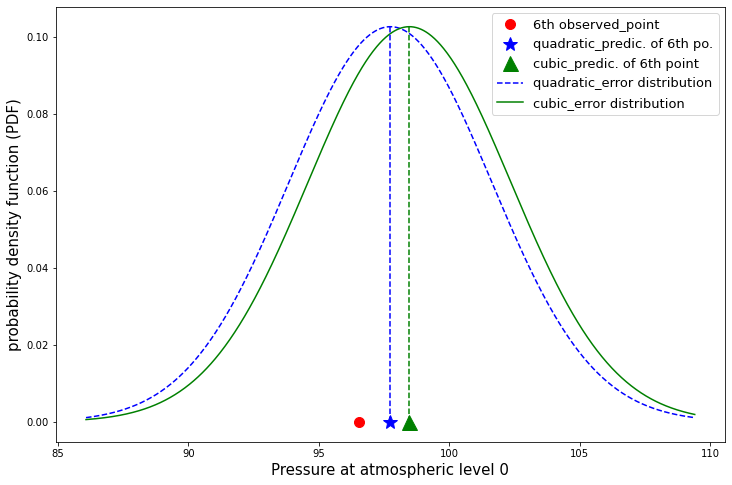

In [492]:
fig, ax1 = plt.subplots(1, 1, figsize = (12, 8))

p1, = ax1.plot(di_data_prob_3[6], xi_data_prob_3[6], "ro", markersize = 10, label = "6th observed_point")
p2, = ax1.plot(y_quadratic[6], xi_data_prob_3[6], "b*", markersize = 15, label = "quadratic_predic. of 6th po.")
p3, = ax1.plot(y_cubic[6], xi_data_prob_3[6], "g^", markersize = 15, label = "cubic_predic. of 6th point")

# ax1.errorbar(di_data_prob_3[6], xi_data_prob_3[6], table_10_4_combined_averaged["pressure_std"][6], \
#             linestyle =" ", ecolor = "k")

l1, = ax1.plot(di, pdf_of_response_variable_at_level_zero_quadratic, "b--", label = "quadratic_error distribution")
l2, = ax1.plot(di, pdf_of_response_variable_at_level_zero_cubic, "g-", label = "cubic_error distribution")

index_quadratic = numpy.argmax(pdf_of_response_variable_at_level_zero_quadratic)
index_cubic     = numpy.argmax(pdf_of_response_variable_at_level_zero_cubic)


# plt.hlines(y = di_data_prob_3[6], xmin = 0.0, xmax = error_pdf_of_response_variable_at_level_minus_one_quadratic[index], 
#           ls='--', color = "r")

plt.vlines(x = 97.7472, ymin = 0.0, ymax = pdf_of_response_variable_at_level_zero_quadratic[index_quadratic], 
          ls='--', color = "b")

plt.vlines(x = 98.4767, ymin = 0.0, ymax = pdf_of_response_variable_at_level_zero_cubic[index_cubic], 
          ls='--', color = "g")

ax1.set_xlabel("Pressure at atmospheric level 0", fontsize = 15)
ax1.set_ylabel("probability density function (PDF)", fontsize = 15)


ax1.legend(handles = [p1, p2, p3, l1, l2], fontsize = 13)


# ax2 = ax1.twinx()

# ax2.set_xlabel('Observed pressure ($d_i$) ', color = 'green', fontsize = 20)
# ax2.tick_params(axis ='y', labelcolor = 'red')

In [494]:
sum_test = 0
for i in range(di.size()[0]):
    sum_test += pdf_of_response_variable_at_level_zero_quadratic[i][0].item() * (di[1].item() - di[0].item())
sum_test

0.9974868947265279

## problem 3 part e; goodness-of-fit; page 286

In [566]:
def bayesian_chi_squared(observed_data, predicted_data, variance):
    """This function takes observed data, predicted data, and data error matrix as input and calculates 
    Bayesian chi-squared goodness-of-fit accroding to eq. 10.139. Note that below you can see a different 
    implementation of the same concept but this time according to eq.10.140 since our data error are 
    independent!"""
    
    E_matrix         = torch.diag(torch.from_numpy(variance)).type(torch.float32)
    E_matrix_inverse = torch.inverse(E_matrix)
    
    size = observed_data.size()[0]
    chi_squared_out = 0.0
    for i in range(size):
        for j in range(size):
            chi_squared = (observed_data[i] - predicted_data[i]) * E_matrix_inverse[i,j] \
            * (observed_data[j] - predicted_data[j])
            chi_squared_out += chi_squared
    
### Second implementation according to eq. 10.140. 
#     chi_squared_out_2 = 0.0
#     for k in range(size):
#         denominator    = torch.from_numpy(variance)[k]
#         chi_squared_2  = ((observed_data[k] - predicted_data[k])**2)/denominator
#         chi_squared_out_2 += chi_squared_2
            
    return chi_squared_out#, chi_squared_out2
    

In [568]:
chi_squared_quadratic = bayesian_chi_squared(di_data_prob_3_tensor, y_quadratic, sig_data_prob_3)

chi_squared_cubic = bayesian_chi_squared(di_data_prob_3_tensor, y_cubic, sig_data_prob_3)

print(chi_squared_quadratic, chi_squared_cubic)

tensor(3.4733, dtype=torch.float64) tensor(2.3726, dtype=torch.float64)


### Conclusion on part e
First, we define our null hypothesis as follows. Given the data points and their measurement error we hyptohesise that the mean of the distributions from which each independet data point comes from can be modeled by a cubic polynomial with parameters A1, A2, A3, and A4 as given above. In pther words, in our least-squares method, the behaviour of the data can be modeled using a cubic model with parameters A1, A2, A3, and A4. (A similar hypothesis can be stated for the quadratic model with parameters A1, A2, and A3.) According to the calculation above the quadratic model with three degrees of freedom (i.e. A1, A2, A3) has a chi-square value of 3.47 and cubic model with four degrees of freedom (i.e. A1, A2, A3, A4) has a chi-square value of 2.37. These values correspnod to P-values of $1 - F (\chi_{quad}^2) = 1 - F_{\chi_{quad}^2}(3.47) = 1 - 0.9015 = 0.0985$ and $1 - F (\chi_{cubic}^2) = F_{\chi_{cubic}^2}(2.37) = 1 - 0.9365 = 0.0635$, respectively. Given the P-values we cannot reject the two models at a $95\%$ confidence level nor can we reject them at $90\%$ confidence level. In other words, both $\chi_{quad}^2$ and $\chi_{cubic}^2$ values fall on the left hand side of the corresponding P-values for $\chi^2$ distribution with three and four degrees of freedom. This indiactes that values we obtained are expected and likely to happen at even $90\%$ confidence level (i.e. they are not rare/extreme events). For more details, read section 7.2.1.

On a side note, our error values come from normal distributions with different variances and are independent (read section 7.2.1).

# Implementing Levenberg-Marquardt algorithm according to page 801 of "[Numerical Recipes](https://www.amazon.com/Numerical-Recipes-3rd-Scientific-Computing/dp/0521880688/ref=sr_1_1?keywords=numerical+recipes&qid=1676495655&s=books&sprefix=numerical+reci%2Cstripbooks-intl-ship%2C166&sr=1-1). The model cannot converge properly! 

In [287]:
# https://www.khanacademy.org/math/multivariable-calculus/applications-of-multivariable-derivatives/quadratic-approximations/a/the-hessian
def chi_square(model_param, predictor = torch.from_numpy(fre_spec_frame["frequency"].values), \
                        observed_data = torch.from_numpy(fre_spec_frame["voltage"].values), std = 0.3):
    """This function calculates the Chi-square statistics for a given set of predicted data, 
    their observed counterpart, and their variance."""
    predicted_data = model_param[0] + model_param[1]*torch.exp(-0.5 * (predictor - model_param[2])**2) + \
            model_param[3]*torch.exp(-0.5 * (predictor - model_param[4])**2) + \
            model_param[5]*torch.exp(-0.5 * (predictor - model_param[6])**2) + \
            model_param[7]*torch.exp(-0.5 * (predictor - model_param[8])**2) + \
            model_param[9]*torch.exp(-0.5 * (predictor - model_param[10])**2)+ \
            model_param[11]*torch.exp(-0.5 * (predictor - model_param[12])**2)+\
            model_param[13]*torch.exp(-0.5 * (predictor - model_param[14])**2)+\
            model_param[15]*torch.exp(-0.5 * (predictor - model_param[16])**2)
    
    return (((observed_data - predicted_data)/std)**2).sum()

In [45]:
def curvature_matrix(parameter_array):
    """Note that Hessian matrix is just twice the curvature matrix (see page 299)."""
    curvature   = 0.5 * torch.autograd.functional.hessian(chi_square, (parameter_array))
    return curvature

In [46]:
def jacobian_matrix(parameter_array):
    """Note that Jacobian matrix has a vector format output with dimensions [1, n] where n is the number of 
    input parameters parameteres. See eq 15.5.8 of NR book!"""
    jacobian    = -0.5 * torch.autograd.functional.jacobian(chi_square, (parameter_array))
    return jacobian

In [47]:
def lambda_curvature_matrix(curvature_matrix, lambda_value):
    
    lambda_tensor = torch.Tensor([lambda_value])

    # extracting diagonal elements of the curvature matrix
    curvature_diagonal    = torch.diagonal(curvature_matrix)

    # multiplying lambda by curvature matrix and building the diagonal matrix
    lambda_curve_diagonal = torch.diag(curvature_diagonal * lambda_tensor)
    # building the final matrix according to eq. 15.5.13 of NR.
    final_curvature = curvature_matrix + lambda_curve_diagonal

    return final_curvature

In [288]:
def parameter_array_update(final_curvature_matrix, jacobian_matrix, parameter_array):
    
    summed_curvature = torch.sum(final_curvature_matrix, 1)
    
    param_0          = parameter_array[0] + jacobian_matrix[0]/summed_curvature[0]
    param_1          = parameter_array[1] + jacobian_matrix[1]/summed_curvature[1]
    param_2          = parameter_array[2] + jacobian_matrix[2]/summed_curvature[2]
    param_3          = parameter_array[3] + jacobian_matrix[3]/summed_curvature[3]
    param_4          = parameter_array[4] + jacobian_matrix[4]/summed_curvature[4]
    param_5          = parameter_array[5] + jacobian_matrix[5]/summed_curvature[5]
    param_6          = parameter_array[6] + jacobian_matrix[6]/summed_curvature[6]
    param_7          = parameter_array[7] + jacobian_matrix[7]/summed_curvature[7]
    param_8          = parameter_array[8] + jacobian_matrix[8]/summed_curvature[8]
    param_9          = parameter_array[9] + jacobian_matrix[9]/summed_curvature[9]
    param_10         = parameter_array[10] + jacobian_matrix[10]/summed_curvature[10]
    param_11         = parameter_array[11] + jacobian_matrix[11]/summed_curvature[11]
    param_12         = parameter_array[12] + jacobian_matrix[12]/summed_curvature[12]
    param_13         = parameter_array[13] + jacobian_matrix[13]/summed_curvature[13]
    param_14         = parameter_array[14] + jacobian_matrix[14]/summed_curvature[14]
    param_15         = parameter_array[15] + jacobian_matrix[15]/summed_curvature[15]
    param_16         = parameter_array[16] + jacobian_matrix[16]/summed_curvature[16]

#     print("Delta ---> ", jacobian_matrix/summed_curvature)
    new_param_array  = torch.Tensor([param_0, param_1, param_2, param_3, param_4, param_5, param_6, param_7, \
                                     param_8, param_9, param_10, param_11, param_12, param_13, param_14, \
                                     param_15, param_16])
    
    return new_param_array

In [333]:
def levenberg_marquardt(input_observed_data, input_predictor, parameter, initial_lambda = 0.001):
    
    chi_square_value_current = chi_square(parameter, predictor = input_predictor, \
                                                 observed_data = input_observed_data, std = 0.3)
    chi_square_value_old = chi_square_value_current
    modified_param_array = parameter
    lambda_coefficient   = initial_lambda

    chi_diff = 10.
    
    while chi_diff > 0.001:
        curv_matrix          = curvature_matrix(modified_param_array)
#         print("hessian matrix ===> ", curv_matrix)
        jacob_matrix         = jacobian_matrix(modified_param_array)
#         print("jacob matrix ===> ", jacob_matrix)
        built_lambd_curv     = lambda_curvature_matrix(curv_matrix, lambda_coefficient)

        new_paramters        = parameter_array_update(built_lambd_curv, jacob_matrix, modified_param_array)
#         print("new param ===> ", new_paramters)
        chi_square_value_new = chi_square(new_paramters, predictor = input_predictor, \
                                                     observed_data = input_observed_data)

        print("chis ---> ", chi_square_value_old, chi_square_value_new, new_paramters)
        if chi_square_value_new >= chi_square_value_old:
            lambda_coefficient   = 10.0 * lambda_coefficient
            print("ga ===> ", lambda_coefficient)
        elif chi_square_value_new < chi_square_value_old:

            lambda_coefficient   = lambda_coefficient/10.0
            print("l ===> ", lambda_coefficient)
            modified_param_array = new_paramters

#         if lambda_coefficient <= 0.01:
#             lambda_coefficient = 0.01
        # Termination condition!!!
        chi_diff = abs(chi_square_value_old - chi_square_value_new)
        
#         if chi_square_value_new < 158.8:
#             lambda_coefficient   = lambda_coefficient/15.
#             print("********* Done **********")
# # # #         print("diff ->")
        
        chi_square_value_old = chi_square_value_new
        
    return new_paramters

In [335]:
param_array = torch.Tensor([ 1.2861,   5.2163,   9.2941,  -3.7203,   9.2160,   3.8254,  11.8496,
        -12.8104,  -7.7456,  -0.2457,  17.2994,   2.3032,   5.5453,  -0.0772,
          5.5452,   2.3032,   5.5453])

levenberg_marquardt(torch.from_numpy(fre_spec_frame["voltage"].values), \
                    torch.from_numpy(fre_spec_frame["frequency"].values), \
                    param_array)

chis --->  tensor(153.3553) tensor(153.4870) tensor([  1.2860,   5.2164,   9.2891,  -3.7202,   9.2215,   3.8252,  11.8500,
        -12.8076,  -7.7450,  -0.2457,  17.2994,   2.3032,   5.5453,  -0.0772,
          5.5452,   2.3032,   5.5453])
ga ===>  0.015
chis --->  tensor(153.4870) tensor(153.4935) tensor([  1.2860,   5.2164,   9.2887,  -3.7202,   9.2213,   3.8252,  11.8499,
        -12.8076,  -7.7450,  -0.2457,  17.2994,   2.3032,   5.5453,  -0.0772,
          5.5452,   2.3032,   5.5453])
ga ===>  0.22499999999999998
chis --->  tensor(153.4935) tensor(159.1924) tensor([  1.2861,   5.2164,   9.3594,  -3.7202,   9.2191,   3.8252,  11.8498,
        -12.8076,  -7.7450,  -0.2457,  17.2994,   2.3032,   5.5453,  -0.0772,
          5.5452,   2.3032,   5.5453])
ga ===>  3.3749999999999996
chis --->  tensor(159.1924) tensor(153.3531) tensor([  1.2861,   5.2164,   9.2944,  -3.7202,   9.2164,   3.8253,  11.8496,
        -12.8076,  -7.7451,  -0.2457,  17.2994,   2.3032,   5.5453,  -0.0772,
       

chis --->  tensor(157.8115) tensor(153.3233) tensor([  1.2859,   5.2173,   9.2990,  -3.7193,   9.2223,   3.8243,  11.8503,
        -12.7685,  -7.7369,  -0.2455,  17.2997,   2.3033,   5.5453,  -0.0771,
          5.5452,   2.3033,   5.5453])
l ===>  0.22499999999999998
chis --->  tensor(153.3233) tensor(157.7273) tensor([  1.2858,   5.2174,   9.3561,  -3.7191,   9.2253,   3.8241,  11.8505,
        -12.7657,  -7.7362,  -0.2454,  17.2998,   2.3033,   5.5453,  -0.0771,
          5.5452,   2.3033,   5.5453])
ga ===>  3.3749999999999996
chis --->  tensor(157.7273) tensor(153.3211) tensor([  1.2859,   5.2174,   9.2994,  -3.7192,   9.2227,   3.8242,  11.8503,
        -12.7657,  -7.7363,  -0.2455,  17.2997,   2.3033,   5.5453,  -0.0771,
          5.5452,   2.3033,   5.5453])
l ===>  0.22499999999999998
chis --->  tensor(153.3211) tensor(157.6454) tensor([  1.2858,   5.2175,   9.3560,  -3.7190,   9.2257,   3.8240,  11.8506,
        -12.7629,  -7.7356,  -0.2454,  17.2998,   2.3033,   5.5453,  -0.0

chis --->  tensor(153.2918) tensor(156.6813) tensor([  1.2856,   5.2184,   9.3544,  -3.7181,   9.2315,   3.8230,  11.8512,
        -12.7232,  -7.7270,  -0.2452,  17.3001,   2.3033,   5.5452,  -0.0771,
          5.5451,   2.3033,   5.5452])
ga ===>  3.3749999999999996
chis --->  tensor(156.6813) tensor(153.2897) tensor([  1.2857,   5.2184,   9.3042,  -3.7182,   9.2289,   3.8231,  11.8510,
        -12.7232,  -7.7271,  -0.2452,  17.3001,   2.3033,   5.5452,  -0.0771,
          5.5451,   2.3033,   5.5452])
l ===>  0.22499999999999998
chis --->  tensor(153.2897) tensor(156.6280) tensor([  1.2856,   5.2185,   9.3544,  -3.7180,   9.2319,   3.8229,  11.8512,
        -12.7203,  -7.7264,  -0.2452,  17.3001,   2.3033,   5.5452,  -0.0771,
          5.5451,   2.3033,   5.5452])
ga ===>  3.3749999999999996
chis --->  tensor(156.6280) tensor(153.2877) tensor([  1.2856,   5.2184,   9.3046,  -3.7181,   9.2293,   3.8230,  11.8510,
        -12.7203,  -7.7264,  -0.2452,  17.3001,   2.3033,   5.5452,  -0.0

chis --->  tensor(155.9409) tensor(153.2590) tensor([  1.2855,   5.2194,   9.3091,  -3.7171,   9.2350,   3.8220,  11.8516,
        -12.6804,  -7.7177,  -0.2450,  17.3004,   2.3034,   5.5452,  -0.0770,
          5.5451,   2.3034,   5.5452])
l ===>  0.22499999999999998
chis --->  tensor(153.2590) tensor(155.9000) tensor([  1.2854,   5.2195,   9.3540,  -3.7170,   9.2380,   3.8218,  11.8519,
        -12.6775,  -7.7170,  -0.2450,  17.3005,   2.3034,   5.5452,  -0.0770,
          5.5451,   2.3034,   5.5452])
ga ===>  3.3749999999999996
chis --->  tensor(155.9000) tensor(153.2570) tensor([  1.2855,   5.2194,   9.3094,  -3.7171,   9.2354,   3.8219,  11.8517,
        -12.6775,  -7.7171,  -0.2450,  17.3004,   2.3034,   5.5452,  -0.0770,
          5.5451,   2.3034,   5.5452])
l ===>  0.22499999999999998
chis --->  tensor(153.2570) tensor(155.8612) tensor([  1.2854,   5.2196,   9.3541,  -3.7169,   9.2384,   3.8218,  11.8519,
        -12.6747,  -7.7164,  -0.2450,  17.3005,   2.3034,   5.5452,  -0.0

chis --->  tensor(155.3624) tensor(153.2269) tensor([  1.2853,   5.2204,   9.3142,  -3.7161,   9.2415,   3.8208,  11.8523,
        -12.6346,  -7.7077,  -0.2448,  17.3008,   2.3035,   5.5452,  -0.0769,
          5.5450,   2.3035,   5.5452])
l ===>  0.22499999999999998
chis --->  tensor(153.2269) tensor(155.3318) tensor([  1.2852,   5.2205,   9.3546,  -3.7160,   9.2444,   3.8207,  11.8525,
        -12.6318,  -7.7070,  -0.2448,  17.3008,   2.3035,   5.5452,  -0.0769,
          5.5450,   2.3035,   5.5452])
ga ===>  3.3749999999999996
chis --->  tensor(155.3318) tensor(153.2250) tensor([  1.2853,   5.2204,   9.3145,  -3.7160,   9.2419,   3.8208,  11.8523,
        -12.6318,  -7.7071,  -0.2448,  17.3008,   2.3035,   5.5452,  -0.0769,
          5.5450,   2.3035,   5.5452])
l ===>  0.22499999999999998
chis --->  tensor(153.2250) tensor(155.2987) tensor([  1.2852,   5.2206,   9.3547,  -3.7159,   9.2448,   3.8206,  11.8526,
        -12.6289,  -7.7064,  -0.2447,  17.3008,   2.3035,   5.5451,  -0.0

chis --->  tensor(154.9232) tensor(153.1956) tensor([  1.2851,   5.2214,   9.3192,  -3.7151,   9.2478,   3.8197,  11.8530,
        -12.5889,  -7.6978,  -0.2446,  17.3011,   2.3035,   5.5451,  -0.0769,
          5.5450,   2.3035,   5.5451])
l ===>  0.22499999999999998
chis --->  tensor(153.1956) tensor(154.9010) tensor([  1.2851,   5.2215,   9.3560,  -3.7149,   9.2508,   3.8195,  11.8532,
        -12.5860,  -7.6971,  -0.2445,  17.3011,   2.3035,   5.5451,  -0.0769,
          5.5450,   2.3035,   5.5451])
ga ===>  3.3749999999999996
chis --->  tensor(154.9010) tensor(153.1937) tensor([  1.2851,   5.2214,   9.3195,  -3.7150,   9.2482,   3.8196,  11.8530,
        -12.5860,  -7.6972,  -0.2446,  17.3011,   2.3035,   5.5451,  -0.0769,
          5.5450,   2.3035,   5.5451])
l ===>  0.22499999999999998
chis --->  tensor(153.1937) tensor(154.8749) tensor([  1.2851,   5.2216,   9.3560,  -3.7149,   9.2512,   3.8195,  11.8532,
        -12.5832,  -7.6965,  -0.2445,  17.3011,   2.3035,   5.5451,  -0.0

KeyboardInterrupt: 

In [ ]:
1.2955,   5.1901,   9.1696,  -3.7460,   9.0879,   3.8728,  11.8247,
        -11.6047,  -6.4780,  -0.2583,  17.2768,   2.2887,   5.5317,  -0.0817,
          5.2414,   2.2887,   5.5317

# Prolem one; page 309

In [3]:
fre_spec = numpy.array([[
1.00, 1.391, 5.25, 5.537, 9.50, 3.113, 13.75, 2.038,
1.17, 1.000, 5.42, 6.091, 9.67, 3.293, 13.92, 2.585,
1.34, 0.552, 5.59, 6.163, 9.84, 3.139, 14.09, 2.492,
1.51, 1.249, 5.76, 5.365, 10.01, 2.840, 14.26, 2.193,
1.68, 0.534, 5.93, 5.916, 10.18, 3.119, 14.43, 1.866,
1.85, 1.386, 6.10, 5.530, 10.35, 3.311, 14.60, 1.571,
2.02, 0.971, 6.27, 4.552, 10.52, 4.347, 14.77, 1.779,
2.19, 0.901, 6.44, 3.833, 10.69, 4.819, 14.94, 1.542,
2.36, 0.851, 6.61, 3.756, 10.86, 4.378, 15.11, 1.562,
2.53, 1.334, 6.78, 3.055, 11.03, 4.544, 15.28, 1.666,
2.70, 0.549, 6.95, 3.009, 11.20, 4.562, 15.45, 0.904,
2.87, 1.373, 7.12, 2.855, 11.37, 5.662, 15.62, 1.074,
3.04, 0.997, 7.29, 2.357, 11.54, 4.479, 15.79, 1.530,
3.21, 1.231, 7.46, 2.732, 11.71, 5.373, 15.96, 0.747,
3.38, 1.586, 7.63, 1.836, 11.88, 4.883, 16.13, 0.945,
3.55, 2.244, 7.80, 1.918, 12.05, 4.678, 16.30, 1.301,
3.72, 1.914, 7.97, 1.534, 12.22, 5.100, 16.47, 1.323,
3.89, 2.467, 8.14, 2.238, 12.39, 3.868, 16.64, 0.919,
4.06, 2.609, 8.31, 2.623, 12.56, 4.132, 16.81, 1.320,
4.23, 3.036, 8.48, 2.275, 12.73, 3.702, 16.98, 0.915,
4.40, 3.581, 8.65, 2.408, 12.90, 3.267, 17.15, 0.814,
4.57, 4.073, 8.82, 2.701, 13.07, 3.323, 17.32, 0.983,
4.74, 5.010, 8.99, 2.659, 13.24, 3.413, 17.49, 1.158,
4.91, 4.989, 9.16, 3.224, 13.41, 2.762, 17.66, 0.917,
5.08, 4.940, 9.33, 2.237, 13.58, 2.418, 17.83, 1.355]]).reshape(25, 8).astype("float32")
fre_spec.shape

(25, 8)

In [4]:
frequencey_list = []
voltage_list    = []

f_count = 0
v_count = 1
while f_count <= 7:
    for i in range (fre_spec[:, 1].size):
        frequencey_list.append(fre_spec[i, f_count])
        voltage_list.append(fre_spec[i, v_count])
        
    f_count += 2
    v_count += 2

In [5]:
fre_spec_frame = pandas.DataFrame({"frequency": frequencey_list, "voltage":voltage_list})
fre_spec_frame["voltage_std"] = 0.3
fre_spec_frame

,frequency,voltage,voltage_std
0,1.00,1.391,0.3
1,1.17,1.000,0.3
2,1.34,0.552,0.3
3,1.51,1.249,0.3
4,1.68,0.534,0.3
...,...,...,...
95,17.15,0.814,0.3
96,17.32,0.983,0.3
97,17.49,1.158,0.3
98,17.66,0.917,0.3


## Part one
### Plot of the raw data (together with error bars)
A few questions about part one of this problem. In the problem statement it is mentioned that the errors have a Gaussian distribution with a standard deviation of 0.3 in voltage (as ploted below). The question is what about other sources of errors? Are we sure that the only source of error is the instrument? What is the assumption here about errors? Are we assuming that our instrument is our only source of error? If not, why do we not include them? Is it a matter of keeping the problem simple?

<ErrorbarContainer object of 3 artists>

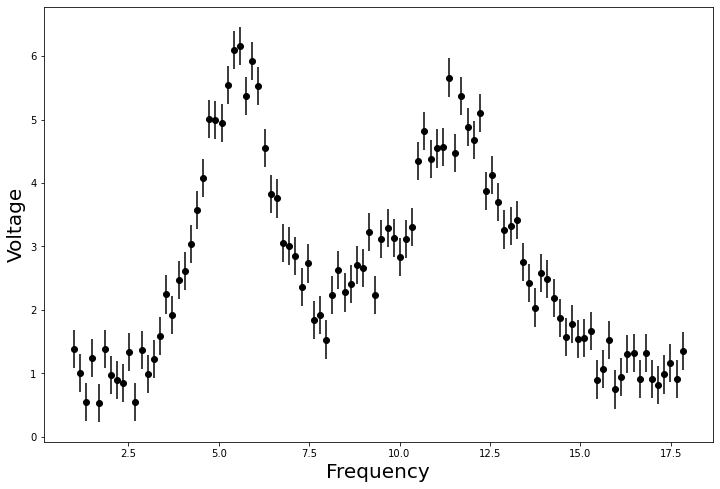

In [6]:
fig, ax = plt.subplots(1, 1, figsize = (12, 8))

ax.plot(fre_spec_frame["frequency"], fre_spec_frame["voltage"], "ko")

ax.set_xlabel("Frequency", fontsize = 20)
ax.set_ylabel("Voltage", fontsize = 20)

ax.errorbar(fre_spec_frame["frequency"], fre_spec_frame["voltage"], \
            fre_spec_frame["voltage_std"],  linestyle =" ", ecolor = "k")

### Application of the Levenberg-Marquardt algorithm

In [68]:
def Gaussian_two(param, predictor):
    """This function takes a dictionary of parameters in the with two keywords of coefficient and mean where 
    coefficient refers to A(i) and mean refers to the mean of the gaussian distributions. The model is the one 
    that is introduced in part one of the problem one. Note that the variance of all these models is the same 
    is given in the problem statement.
    """
    
    return param[0] + param[1]*torch.exp(-0.5 * (predictor - param[2])**2) + \
            param[3]*torch.exp(-0.5 * (predictor - param[4])**2)

In [69]:
new_set_of_param_two  = torch.Tensor([ 2.3128,  4.1276,  5.8094, -1.4063,  6.9724]) # Two latest
levenberg_two         = Gaussian_two(new_set_of_param_two, torch.from_numpy(fre_spec_frame["frequency"].values))
levenberg_two

tensor([2.3128, 2.3129, 2.3130, 2.3132, 2.3136, 2.3144, 2.3159, 2.3187, 2.3235,
        2.3318, 2.3455, 2.3674, 2.4014, 2.4524, 2.5264, 2.6303, 2.7710, 2.9548,
        3.1862, 3.4659, 3.7902, 4.1492, 4.5265, 4.8996, 5.2417, 5.5235, 5.7176,
        5.8014, 5.7610, 5.5937, 5.3085, 4.9261, 4.4757, 3.9917, 3.5094, 3.0606,
        2.6704, 2.3550, 2.1211, 1.9669, 1.8835, 1.8577, 1.8746, 1.9190, 1.9781,
        2.0415, 2.1021, 2.1553, 2.1994, 2.2339, 2.2597, 2.2782, 2.2910, 2.2995,
        2.3049, 2.3083, 2.3103, 2.3114, 2.3121, 2.3124, 2.3126, 2.3127, 2.3128,
        2.3128, 2.3128, 2.3128, 2.3128, 2.3128, 2.3128, 2.3128, 2.3128, 2.3128,
        2.3128, 2.3128, 2.3128, 2.3128, 2.3128, 2.3128, 2.3128, 2.3128, 2.3128,
        2.3128, 2.3128, 2.3128, 2.3128, 2.3128, 2.3128, 2.3128, 2.3128, 2.3128,
        2.3128, 2.3128, 2.3128, 2.3128, 2.3128, 2.3128, 2.3128, 2.3128, 2.3128,
        2.3128])

In [62]:
def Gaussian_three(param, predictor):
    """This function takes a dictionary of parameters in the with two keywords of coefficient and mean where 
    coefficient refers to A(i) and mean refers to the mean of the gaussian distributions. The model is the one 
    that is introduced in part one of the problem one. Note that the variance of all these models is the same 
    is given in the problem statement.
    """
    
    return param[0] + param[1]*torch.exp(-0.5 * (predictor - param[2])**2) + \
            param[3]*torch.exp(-0.5 * (predictor - param[4])**2) + \
            param[5]*torch.exp(-0.5 * (predictor - param[6])**2)

In [66]:
new_set_of_param_three  = torch.Tensor([ 2.6639,  4.1810,  5.8636, -2.0044,  6.8081, -2.0423,  2.2353]) # Three

levenberg_three = Gaussian_three(new_set_of_param_three, torch.from_numpy(fre_spec_frame["frequency"].values))
levenberg_three

tensor([1.7117, 1.5060, 1.2961, 1.0943, 0.9141, 0.7690, 0.6710, 0.6286, 0.6463,
        0.7243, 0.8582, 1.0407, 1.2624, 1.5144, 1.7890, 2.0811, 2.3887, 2.7124,
        3.0536, 3.4133, 3.7900, 4.1773, 4.5631, 4.9294, 5.2536, 5.5103, 5.6754,
        5.7294, 5.6611, 5.4703, 5.1686, 4.7787, 4.3316, 3.8628, 3.4076, 2.9969,
        2.6536, 2.3909, 2.2124, 2.1125, 2.0796, 2.0981, 2.1516, 2.2248, 2.3048,
        2.3825, 2.4519, 2.5100, 2.5560, 2.5908, 2.6160, 2.6335, 2.6452, 2.6528,
        2.6575, 2.6603, 2.6619, 2.6629, 2.6634, 2.6636, 2.6638, 2.6638, 2.6639,
        2.6639, 2.6639, 2.6639, 2.6639, 2.6639, 2.6639, 2.6639, 2.6639, 2.6639,
        2.6639, 2.6639, 2.6639, 2.6639, 2.6639, 2.6639, 2.6639, 2.6639, 2.6639,
        2.6639, 2.6639, 2.6639, 2.6639, 2.6639, 2.6639, 2.6639, 2.6639, 2.6639,
        2.6639, 2.6639, 2.6639, 2.6639, 2.6639, 2.6639, 2.6639, 2.6639, 2.6639,
        2.6639])

In [88]:
def Gaussian_four(param, predictor):
    """This function takes a dictionary of parameters in the with two keywords of coefficient and mean where 
    coefficient refers to A(i) and mean refers to the mean of the gaussian distributions. The model is the one 
    that is introduced in part one of the problem one. Note that the variance of all these models is the same 
    is given in the problem statement.
    """
    
    return param[0] + param[1]*torch.exp(-0.5 * (predictor - param[2])**2) + \
            param[3]*torch.exp(-0.5 * (predictor - param[4])**2) + \
            param[5]*torch.exp(-0.5 * (predictor - param[6])**2) + \
            param[7]*torch.exp(-0.5 * (predictor - param[8])**2)

In [89]:
new_set_of_param_four  = torch.Tensor([ 2.3121,  4.1210,  5.8080, -1.3958,  6.9649, -7.0517, -7.6258, -7.0517,
        -7.6258]) # four

levenberg_four = Gaussian_four(new_set_of_param_four, torch.from_numpy(fre_spec_frame["frequency"].values))
levenberg_four

tensor([2.3121, 2.3122, 2.3123, 2.3125, 2.3129, 2.3137, 2.3152, 2.3180, 2.3229,
        2.3312, 2.3449, 2.3668, 2.4009, 2.4519, 2.5261, 2.6300, 2.7708, 2.9547,
        3.1859, 3.4655, 3.7894, 4.1479, 4.5244, 4.8967, 5.2376, 5.5182, 5.7111,
        5.7939, 5.7529, 5.5855, 5.3009, 4.9196, 4.4709, 3.9892, 3.5094, 3.0633,
        2.6757, 2.3624, 2.1302, 1.9770, 1.8939, 1.8679, 1.8840, 1.9274, 1.9852,
        2.0473, 2.1065, 2.1586, 2.2016, 2.2353, 2.2605, 2.2785, 2.2909, 2.2992,
        2.3044, 2.3077, 2.3096, 2.3108, 2.3114, 2.3117, 2.3119, 2.3120, 2.3121,
        2.3121, 2.3121, 2.3121, 2.3121, 2.3121, 2.3121, 2.3121, 2.3121, 2.3121,
        2.3121, 2.3121, 2.3121, 2.3121, 2.3121, 2.3121, 2.3121, 2.3121, 2.3121,
        2.3121, 2.3121, 2.3121, 2.3121, 2.3121, 2.3121, 2.3121, 2.3121, 2.3121,
        2.3121, 2.3121, 2.3121, 2.3121, 2.3121, 2.3121, 2.3121, 2.3121, 2.3121,
        2.3121])

In [103]:
def Gaussian_five(param, predictor):
    """This function takes a dictionary of parameters in the with two keywords of coefficient and mean where 
    coefficient refers to A(i) and mean refers to the mean of the gaussian distributions. The model is the one 
    that is introduced in part one of the problem one. Note that the variance of all these models is the same 
    is given in the problem statement.
    """
    
    return param[0] + param[1]*torch.exp(-0.5 * (predictor - param[2])**2) + \
            param[3]*torch.exp(-0.5 * (predictor - param[4])**2) + \
            param[5]*torch.exp(-0.5 * (predictor - param[6])**2) + \
            param[7]*torch.exp(-0.5 * (predictor - param[8])**2) + \
            param[9]*torch.exp(-0.5 * (predictor - param[10])**2)

In [104]:
new_set_of_param_five  = torch.Tensor([ 2.6237,  4.2459,  5.6074, -0.8820,  5.3229, -1.0169,  7.0759, -1.9115,
         2.3291, -1.0560, -0.7732]) # five

levenberg_five = Gaussian_four(new_set_of_param_five, torch.from_numpy(fre_spec_frame["frequency"].values))
levenberg_five

tensor([1.8334, 1.6474, 1.4518, 1.2573, 1.0760, 0.9210, 0.8044, 0.7364, 0.7239,
        0.7698, 0.8729, 1.0288, 1.2309, 1.4715, 1.7439, 2.0427, 2.3646, 2.7077,
        3.0706, 3.4511, 3.8437, 4.2391, 4.6232, 4.9773, 5.2797, 5.5084, 5.6436,
        5.6713, 5.5857, 5.3904, 5.0991, 4.7338, 4.3221, 3.8945, 3.4801, 3.1041,
        2.7848, 2.5333, 2.3525, 2.2390, 2.1840, 2.1759, 2.2016, 2.2488, 2.3068,
        2.3671, 2.4239, 2.4737, 2.5149, 2.5474, 2.5719, 2.5896, 2.6019, 2.6102,
        2.6156, 2.6190, 2.6210, 2.6222, 2.6229, 2.6233, 2.6235, 2.6236, 2.6237,
        2.6237, 2.6237, 2.6237, 2.6237, 2.6237, 2.6237, 2.6237, 2.6237, 2.6237,
        2.6237, 2.6237, 2.6237, 2.6237, 2.6237, 2.6237, 2.6237, 2.6237, 2.6237,
        2.6237, 2.6237, 2.6237, 2.6237, 2.6237, 2.6237, 2.6237, 2.6237, 2.6237,
        2.6237, 2.6237, 2.6237, 2.6237, 2.6237, 2.6237, 2.6237, 2.6237, 2.6237,
        2.6237])

In [125]:
def Gaussian_six(param, predictor):
    """This function takes a dictionary of parameters in the with two keywords of coefficient and mean where 
    coefficient refers to A(i) and mean refers to the mean of the gaussian distributions. The model is the one 
    that is introduced in part one of the problem one. Note that the variance of all these models is the same 
    is given in the problem statement.
    """
    
    return param[0] + param[1]*torch.exp(-0.5 * (predictor - param[2])**2) + \
            param[3]*torch.exp(-0.5 * (predictor - param[4])**2) + \
            param[5]*torch.exp(-0.5 * (predictor - param[6])**2) + \
            param[7]*torch.exp(-0.5 * (predictor - param[8])**2) + \
            param[9]*torch.exp(-0.5 * (predictor - param[10])**2)+ \
            param[11]*torch.exp(-0.5 * (predictor - param[12])**2)

In [207]:
# 1.6915,  4.9001,  7.5771, -4.8704,  7.4832,  3.6455, 11.5590, -7.3531, -7.3867, -0.7672, 16.8042,  4.0640,  5.6112
    
new_set_of_param_six  = torch.Tensor([1.3041,   5.4748,   9.0909,  -4.0925,   8.9819,   3.8652,  11.8181,
        -28.4095, -11.2316,  -0.2696,  17.2601,   4.5111,   5.5497]) # six

levenberg_six = Gaussian_four(new_set_of_param_six, torch.from_numpy(fre_spec_frame["frequency"].values))
levenberg_six


tensor([1.3041, 1.3041, 1.3041, 1.3041, 1.3041, 1.3041, 1.3041, 1.3041, 1.3041,
        1.3041, 1.3041, 1.3041, 1.3041, 1.3041, 1.3041, 1.3041, 1.3041, 1.3041,
        1.3041, 1.3041, 1.3041, 1.3041, 1.3040, 1.3039, 1.3038, 1.3037, 1.3034,
        1.3030, 1.3026, 1.3023, 1.3023, 1.3030, 1.3054, 1.3107, 1.3208, 1.3382,
        1.3660, 1.4078, 1.4671, 1.5470, 1.6495, 1.7748, 1.9208, 2.0828, 2.2535,
        2.4242, 2.5856, 2.7296, 2.8507, 2.9477, 3.0241, 3.0887, 3.1539, 3.2341,
        3.3434, 3.4926, 3.6865, 3.9226, 4.1900, 4.4703, 4.7397, 4.9715, 5.1403,
        5.2251, 5.2125, 5.0985, 4.8887, 4.5976, 4.2459, 3.8581, 3.4589, 3.0706,
        2.7111, 2.3930, 2.1228, 1.9022, 1.7286, 1.5968, 1.5001, 1.4317, 1.3848,
        1.3536, 1.3337, 1.3212, 1.3138, 1.3094, 1.3069, 1.3056, 1.3048, 1.3045,
        1.3043, 1.3042, 1.3041, 1.3041, 1.3041, 1.3041, 1.3041, 1.3041, 1.3041,
        1.3041])

In [310]:
def Gaussian_eight(param, predictor):
    """This function takes a dictionary of parameters in the with two keywords of coefficient and mean where 
    coefficient refers to A(i) and mean refers to the mean of the gaussian distributions. The model is the one 
    that is introduced in part one of the problem one. Note that the variance of all these models is the same 
    is given in the problem statement.
    """
    
    return param[0] + param[1]*torch.exp(-0.5 * (predictor - param[2])**2) + \
            param[3]*torch.exp(-0.5 * (predictor - param[4])**2) + \
            param[5]*torch.exp(-0.5 * (predictor - param[6])**2) + \
            param[7]*torch.exp(-0.5 * (predictor - param[8])**2) + \
            param[9]*torch.exp(-0.5 * (predictor - param[10])**2)+ \
            param[11]*torch.exp(-0.5 * (predictor - param[12])**2)+\
            param[13]*torch.exp(-0.5 * (predictor - param[14])**2)+\
            param[15]*torch.exp(-0.5 * (predictor - param[16])**2)

In [336]:
# 1.6915,  4.9001,  7.5771, -4.8704,  7.4832,  3.6455, 11.5590, -7.3531, -7.3867, -0.7672, 16.8042,  4.0640,  5.6112
    
new_set_of_param_eight  = torch.Tensor([1.2861,   5.2163,   9.2941,  -3.7203,   9.2160,   3.8254,  11.8496,
        -12.8104,  -7.7456,  -0.2457,  17.2994,   2.3032,   5.5453,  -0.0772,
          5.5452,   2.3032,   5.5453]) # eight

levenberg_eight = Gaussian_four(new_set_of_param_eight, torch.from_numpy(fre_spec_frame["frequency"].values))
levenberg_eight


tensor([1.2861, 1.2861, 1.2861, 1.2861, 1.2861, 1.2861, 1.2861, 1.2861, 1.2861,
        1.2861, 1.2861, 1.2861, 1.2861, 1.2861, 1.2861, 1.2861, 1.2861, 1.2861,
        1.2861, 1.2861, 1.2861, 1.2861, 1.2861, 1.2861, 1.2861, 1.2861, 1.2862,
        1.2864, 1.2867, 1.2875, 1.2889, 1.2915, 1.2960, 1.3036, 1.3159, 1.3350,
        1.3634, 1.4042, 1.4605, 1.5352, 1.6305, 1.7473, 1.8847, 2.0396, 2.2066,
        2.3784, 2.5470, 2.7043, 2.8440, 2.9628, 3.0618, 3.1463, 3.2260, 3.3132,
        3.4209, 3.5601, 3.7373, 3.9526, 4.1981, 4.4585, 4.7124, 4.9350, 5.1014,
        5.1903, 5.1869, 5.0854, 4.8892, 4.6109, 4.2697, 3.8890, 3.4931, 3.1047,
        2.7422, 2.4189, 2.1424, 1.9149, 1.7348, 1.5971, 1.4955, 1.4231, 1.3732,
        1.3399, 1.3184, 1.3049, 1.2968, 1.2920, 1.2892, 1.2877, 1.2869, 1.2865,
        1.2863, 1.2862, 1.2861, 1.2861, 1.2861, 1.2861, 1.2861, 1.2861, 1.2861,
        1.2861])

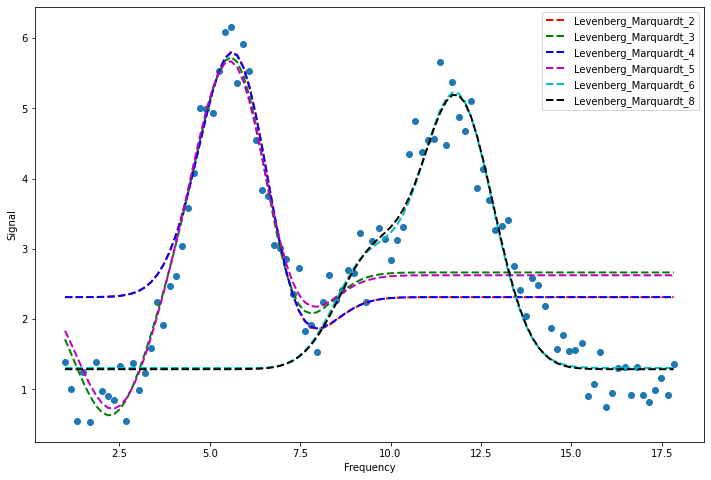

In [337]:
fig, ax = plt.subplots(1, 1, figsize = (12, 8))


plt.plot(fre_spec_frame["frequency"], fre_spec_frame["voltage"], 'o')

plt.plot(fre_spec_frame["frequency"], levenberg_two, \
         'r--', linewidth=2, label='Levenberg_Marquardt_2')

plt.plot(fre_spec_frame["frequency"], levenberg_three, \
         'g--', linewidth=2, label='Levenberg_Marquardt_3')

plt.plot(fre_spec_frame["frequency"], levenberg_four, \
         'b--', linewidth=2, label='Levenberg_Marquardt_4')

plt.plot(fre_spec_frame["frequency"], levenberg_five, \
         'm--', linewidth=2, label='Levenberg_Marquardt_5')

plt.plot(fre_spec_frame["frequency"], levenberg_six, \
         'c--', linewidth=2, label='Levenberg_Marquardt_6')

plt.plot(fre_spec_frame["frequency"], levenberg_eight, \
         'k--', linewidth=2, label='Levenberg_Marquardt_8')

plt.xlabel("Frequency")
plt.ylabel("Signal")
plt.legend()


# Trying to reproduce figure 11.6 on page 302 and the results on page 303.

In [2]:
fig_11_6_fre = [0.0, 0.1, 0.24, 0.37, 0.48, 0.61, 0.72, 0.84, 0.98, 1.16, 1.22, 1.32, 1.45, 1.58, 1.70, 1.84, 
      1.96, 2.16, 2.20, 2.28, 2.40, 2.50, 2.64, 2.79, 2.84, 3.0, 3.12, 3.24, 3.36, 3.42, 3.60, 3.70, 
      3.83, 3.95, 4.05, 4.20, 4.31, 4.43, 4.57, 4.65, 4.80, 4.91, 5.02, 5.17, 5.29, 5.39, 5.51, 5.63, 
      5.77, 5.87, 6.0]

fig_11_6_sig = [0.73, 0.88, 0.70, 1.12, 0.98, 1.32, 1.03, 1.18, 0.97, 0.89 ,1.11, 0.80, 0.97, 0.98, 0.98, 1.05, 
       0.84, 1.97, 2.38, 3.53, 3.50, 4.11, 3.73, 3.48, 2.87, 3.05, 1.98, 1.79, 2.11, 1.40, 1.02, 0.78, 
       1.13, 0.88, 0.89, 0.65, 1.37, 0.6, 0.79, 1.39, 0.66, 0.77, 1.30, 1.18, 1.28, 1.26, 0.71, 0.7, 
       0.79, 1.17, 1.14]

In [3]:
fig_11_6_frame =  pandas.DataFrame({"frequency": fig_11_6_fre, "voltage":fig_11_6_sig})
fig_11_6_frame["voltage_std"] = 0.3


<ErrorbarContainer object of 3 artists>

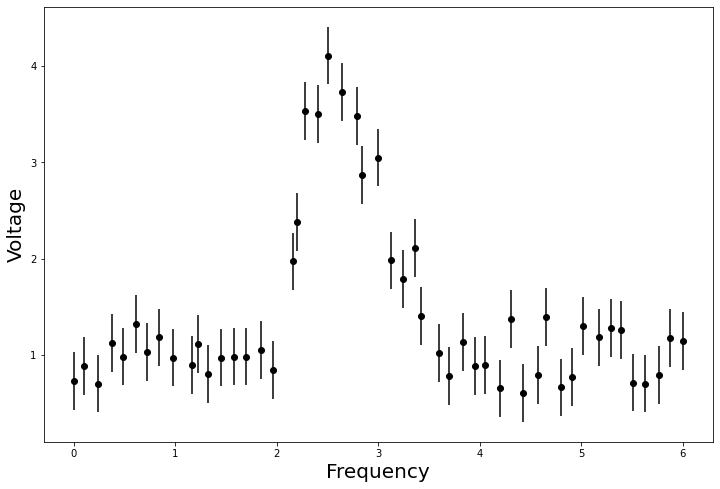

In [4]:
fig, ax = plt.subplots(1, 1, figsize = (12, 8))

ax.plot(fig_11_6_frame["frequency"], fig_11_6_frame["voltage"], "ko")

ax.set_xlabel("Frequency", fontsize = 20)
ax.set_ylabel("Voltage", fontsize = 20)

ax.errorbar(fig_11_6_frame["frequency"], fig_11_6_frame["voltage"], \
            fig_11_6_frame["voltage_std"],  linestyle =" ", ecolor = "k")

In [338]:
# https://www.khanacademy.org/math/multivariable-calculus/applications-of-multivariable-derivatives/quadratic-approximations/a/the-hessian
def chi_square_two(model_param, predictor = torch.from_numpy(fig_11_6_frame["frequency"].values), \
                        observed_data = torch.from_numpy(fig_11_6_frame["voltage"].values), std = 0.3):
    """This function calculates the Chi-square statistics for a given set of predicted data, 
    their observed counterpart, and their variance."""
    predicted_data = model_param[0] + model_param[1] * torch.sin(6.28 * \
                        (predictor - model_param[2])/1.5)/(6.28 * (predictor - model_param[2])/ 1.5) + \
                        model_param[3] * torch.sin(6.28 * \
                        (predictor - model_param[4])/1.5)/(6.28 * (predictor - model_param[4])/ 1.5)
    
    
    return (((observed_data - predicted_data)/std)**2).sum()

In [252]:
def curvature_matrix_two(parameter_array):
    """Note that Hessian matrix is just twice the curvature matrix (see page 299)."""
    curvature   = 0.5 * torch.autograd.functional.hessian(chi_square_two, (parameter_array))
    return curvature

In [253]:
def jacobian_matrix_two(parameter_array):
    """Note that Jacobian matrix has a vector format output with dimensions [1, n] where n is the number of 
    input parameters parameteres. See eq 15.5.8 of NR book!"""
    jacobian    = -0.5 * torch.autograd.functional.jacobian(chi_square_two, (parameter_array))
    return jacobian

In [389]:
def lambda_curvature_matrix(curvature_matrix, lambda_value):
    
    lambda_tensor = torch.Tensor([lambda_value])

    # extracting diagonal elements of the curvature matrix
    curvature_diagonal    = torch.diagonal(curvature_matrix)

    # multiplying lambda by curvature matrix and building the diagonal matrix
    lambda_curve_diagonal = torch.diag(curvature_diagonal * lambda_tensor)
    # building the final matrix according to eq. 15.5.13 of NR.
    final_curvature = curvature_matrix + lambda_curve_diagonal

    return final_curvature

In [339]:
def parameter_array_update_two(final_curvature_matrix, jacobian_matrix, parameter_array):
    
    summed_curvature = torch.sum(final_curvature_matrix, 1)
    
    param_0          = parameter_array[0] + jacobian_matrix[0]/summed_curvature[0]
    param_1          = parameter_array[1] + jacobian_matrix[1]/summed_curvature[1]
    param_2          = parameter_array[2] + jacobian_matrix[2]/summed_curvature[2]
    param_3          = parameter_array[3] + jacobian_matrix[3]/summed_curvature[3]
    param_4          = parameter_array[4] + jacobian_matrix[4]/summed_curvature[4]

#     print("Delta ---> ", jacobian_matrix/summed_curvature)
    new_param_array  = torch.Tensor([param_0, param_1, param_2, param_3, param_4])
    
    return new_param_array

In [390]:
def levenberg_marquardt_two(input_observed_data, input_predictor, parameter, initial_lambda = 0.001):
    
    chi_square_value_current = chi_square_two(parameter, predictor = input_predictor, \
                                                 observed_data = input_observed_data, std = 0.3)
    chi_square_value_old = chi_square_value_current
    modified_param_array = parameter
    lambda_coefficient   = initial_lambda

    chi_diff = 10.
    
    while chi_diff > 0.001:
        curv_matrix          = curvature_matrix_two(modified_param_array)

        jacob_matrix         = jacobian_matrix_two(modified_param_array)

        built_lambd_curv     = lambda_curvature_matrix(curv_matrix, lambda_coefficient)

        new_paramters        = parameter_array_update_two(built_lambd_curv, jacob_matrix, modified_param_array)

        chi_square_value_new = chi_square_two(new_paramters, predictor = input_predictor, \
                                                     observed_data = input_observed_data, std = 0.3)

        print("chis ---> ", chi_square_value_old, chi_square_value_new, new_paramters)
        if chi_square_value_new >= chi_square_value_old:
            lambda_coefficient   = 10.0 * lambda_coefficient
            print("ga ===> ", lambda_coefficient)
        elif chi_square_value_new < chi_square_value_old:

            lambda_coefficient   = lambda_coefficient/10.0
            print("l ===> ", lambda_coefficient)
            modified_param_array = new_paramters

        # Termination condition!!!
        chi_diff = abs(chi_square_value_old - chi_square_value_new)
        
        chi_square_value_old = chi_square_value_new
        
    return new_paramters, curv_matrix, chi_square_value_new

In [356]:
param_array_two = torch.Tensor([1.2,   3.,   2.6, 1, 3.5])

test_param, curvature_matrix, min_chi_square= levenberg_marquardt_two(torch.from_numpy(fig_11_6_frame["voltage"].values), \
                    torch.from_numpy(fig_11_6_frame["frequency"].values), \
                    param_array_two)

chis --->  tensor(115.4913, dtype=torch.float64) tensor(68.8347, dtype=torch.float64) tensor([0.9587, 2.5525, 2.5854, 0.8860, 3.5301])
l ===>  0.0001
chis --->  tensor(68.8347, dtype=torch.float64) tensor(74.3014, dtype=torch.float64) tensor([0.9794, 2.8010, 2.5980, 0.8347, 3.6521])
ga ===>  0.001
chis --->  tensor(74.3014, dtype=torch.float64) tensor(74.3117, dtype=torch.float64) tensor([0.9794, 2.8008, 2.5980, 0.8347, 3.6522])
ga ===>  0.01
chis --->  tensor(74.3117, dtype=torch.float64) tensor(74.4151, dtype=torch.float64) tensor([0.9792, 2.7985, 2.5979, 0.8348, 3.6528])
ga ===>  0.1
chis --->  tensor(74.4151, dtype=torch.float64) tensor(75.5375, dtype=torch.float64) tensor([0.9778, 2.7777, 2.5966, 0.8359, 3.6597])
ga ===>  1.0
chis --->  tensor(75.5375, dtype=torch.float64) tensor(103.6373, dtype=torch.float64) tensor([0.9700, 2.6746, 2.5909, 0.8443, 3.8217])
ga ===>  10.0
chis --->  tensor(103.6373, dtype=torch.float64) tensor(65.3766, dtype=torch.float64) tensor([0.9609, 2.5744, 

chis --->  tensor(80.6722, dtype=torch.float64) tensor(55.8328, dtype=torch.float64) tensor([0.9833, 2.6443, 2.5713, 0.7649, 3.3523])
l ===>  1.0
chis --->  tensor(55.8328, dtype=torch.float64) tensor(86.1879, dtype=torch.float64) tensor([0.9855, 2.6323, 2.5685, 0.7644, 3.6879])
ga ===>  10.0
chis --->  tensor(86.1879, dtype=torch.float64) tensor(55.7942, dtype=torch.float64) tensor([0.9838, 2.6422, 2.5708, 0.7647, 3.3504])
l ===>  1.0
chis --->  tensor(55.7942, dtype=torch.float64) tensor(94.1581, dtype=torch.float64) tensor([0.9859, 2.6301, 2.5681, 0.7645, 3.7369])
ga ===>  10.0
chis --->  tensor(94.1581, dtype=torch.float64) tensor(55.7572, dtype=torch.float64) tensor([0.9842, 2.6401, 2.5703, 0.7646, 3.3485])
l ===>  1.0
chis --->  tensor(55.7572, dtype=torch.float64) tensor(106.3044, dtype=torch.float64) tensor([0.9862, 2.6279, 2.5677, 0.7646, 3.8077])
ga ===>  10.0
chis --->  tensor(106.3044, dtype=torch.float64) tensor(55.7218, dtype=torch.float64) tensor([0.9846, 2.6380, 2.5699,

chis --->  tensor(56.0443, dtype=torch.float64) tensor(55.0961, dtype=torch.float64) tensor([0.9916, 2.5881, 2.5602, 0.7803, 3.3108])
l ===>  1.0
chis --->  tensor(55.0961, dtype=torch.float64) tensor(55.9038, dtype=torch.float64) tensor([0.9925, 2.5785, 2.5584, 0.7824, 3.2356])
ga ===>  10.0
chis --->  tensor(55.9038, dtype=torch.float64) tensor(55.0789, dtype=torch.float64) tensor([0.9918, 2.5865, 2.5599, 0.7812, 3.3097])
l ===>  1.0
chis --->  tensor(55.0789, dtype=torch.float64) tensor(55.7820, dtype=torch.float64) tensor([0.9926, 2.5770, 2.5581, 0.7834, 3.2383])
ga ===>  10.0
chis --->  tensor(55.7820, dtype=torch.float64) tensor(55.0620, dtype=torch.float64) tensor([0.9920, 2.5849, 2.5596, 0.7821, 3.3086])
l ===>  1.0
chis --->  tensor(55.0620, dtype=torch.float64) tensor(55.6757, dtype=torch.float64) tensor([0.9927, 2.5756, 2.5578, 0.7843, 3.2408])
ga ===>  10.0
chis --->  tensor(55.6757, dtype=torch.float64) tensor(55.0455, dtype=torch.float64) tensor([0.9921, 2.5833, 2.5593, 0

chis --->  tensor(54.6966, dtype=torch.float64) tensor(54.6430, dtype=torch.float64) tensor([0.9955, 2.5008, 2.5444, 0.8141, 3.2281])
l ===>  0.01
chis --->  tensor(54.6430, dtype=torch.float64) tensor(55.2868, dtype=torch.float64) tensor([0.9998, 2.4589, 2.5388, 0.8207, 3.1767])
ga ===>  0.1
chis --->  tensor(55.2868, dtype=torch.float64) tensor(55.7788, dtype=torch.float64) tensor([0.9995, 2.4634, 2.5393, 0.8206, 3.1646])
ga ===>  1.0
chis --->  tensor(55.7788, dtype=torch.float64) tensor(54.6973, dtype=torch.float64) tensor([0.9978, 2.4827, 2.5416, 0.8197, 3.2750])
l ===>  0.1
chis --->  tensor(54.6973, dtype=torch.float64) tensor(55.9129, dtype=torch.float64) tensor([1.0009, 2.5322, 2.5456, 0.8268, 3.3331])
ga ===>  1.0
chis --->  tensor(55.9129, dtype=torch.float64) tensor(55.6785, dtype=torch.float64) tensor([0.9997, 2.5054, 2.5437, 0.8259, 3.1859])
l ===>  0.1
chis --->  tensor(55.6785, dtype=torch.float64) tensor(87.8285, dtype=torch.float64) tensor([0.9991, 2.3965, 2.5330, 0.8

chis --->  tensor(54.2351, dtype=torch.float64) tensor(56.5175, dtype=torch.float64) tensor([1.0009, 2.4845, 2.5301, 0.8956, 3.3160])
ga ===>  1.0
chis --->  tensor(56.5175, dtype=torch.float64) tensor(54.2781, dtype=torch.float64) tensor([1.0001, 2.4459, 2.5285, 0.8949, 3.1873])
l ===>  0.1
chis --->  tensor(54.2781, dtype=torch.float64) tensor(68.0604, dtype=torch.float64) tensor([0.9982, 2.3798, 2.5231, 0.8979, 2.9797])
ga ===>  1.0
chis --->  tensor(68.0604, dtype=torch.float64) tensor(54.1209, dtype=torch.float64) tensor([0.9989, 2.4166, 2.5256, 0.8975, 3.2264])
l ===>  0.1
chis --->  tensor(54.1209, dtype=torch.float64) tensor(55.9776, dtype=torch.float64) tensor([1.0003, 2.4710, 2.5281, 0.9027, 3.3006])
ga ===>  1.0
chis --->  tensor(55.9776, dtype=torch.float64) tensor(54.1179, dtype=torch.float64) tensor([0.9998, 2.4394, 2.5269, 0.9021, 3.1912])
l ===>  0.1
chis --->  tensor(54.1179, dtype=torch.float64) tensor(60.7600, dtype=torch.float64) tensor([0.9980, 2.3873, 2.5226, 0.90

In [284]:
def sine_two(param, predictor):
    """This function takes a dictionary of parameters in the with two keywords of coefficient and mean where 
    coefficient refers to A(i) and mean refers to the mean of the gaussian distributions. The model is the one 
    that is introduced in part one of the problem one. Note that the variance of all these models is the same 
    is given in the problem statement.
    """
    
    return param[0]+param[1]*torch.sin(6.28*(predictor-param[2])/1.5)/(6.28*(predictor-param[2])/1.5)

In [271]:
sine_param_two  = torch.Tensor([1.1019, 2.5338, 2.6514]) # Two latest
sine_sig_two    = sine_two(sine_param_two, torch.from_numpy(fig_11_6_frame["frequency"].values))
sine_sig_two

tensor([0.8749, 0.8763, 0.9459, 1.0684, 1.1932, 1.3300, 1.4068, 1.4239, 1.3391,
        1.0860, 0.9808, 0.8059, 0.6233, 0.5515, 0.6275, 0.9134, 1.3159, 2.1906,
        2.3750, 2.7312, 3.1931, 3.4694, 3.6347, 3.4959, 3.3805, 2.8273, 2.2959,
        1.7463, 1.2505, 1.0419, 0.6312, 0.5545, 0.6010, 0.7529, 0.9224, 1.1797,
        1.3259, 1.4143, 1.4123, 1.3657, 1.2191, 1.0935, 0.9813, 0.8856, 0.8728,
        0.9049, 0.9826, 1.0824, 1.1933, 1.2502, 1.2814], dtype=torch.float64)

In [277]:
original_sine_param  = torch.Tensor([1.04587, 3.20636, 2.57332]) # Two latest
original_sine_two    = sine_two(original_sine_param, torch.from_numpy(fig_11_6_frame["frequency"].values))
original_sine_two

tensor([0.7556, 0.7976, 0.9352, 1.1150, 1.2704, 1.4101, 1.4572, 1.4112, 1.2275,
        0.8519, 0.7183, 0.5201, 0.3641, 0.3901, 0.6142, 1.1204, 1.7237, 2.8752,
        3.0973, 3.5050, 3.9782, 4.2021, 4.2107, 3.8302, 3.6264, 2.7992, 2.1010,
        1.4402, 0.8985, 0.6910, 0.3629, 0.3661, 0.5260, 0.7697, 0.9937, 1.2827,
        1.4140, 1.4570, 1.3815, 1.2919, 1.0810, 0.9310, 0.8173, 0.7532, 0.7839,
        0.8558, 0.9759, 1.1032, 1.2206, 1.2653, 1.2645], dtype=torch.float64)

In [343]:
def sine_three(param, predictor):
    """This function takes a dictionary of parameters in the with two keywords of coefficient and mean where 
    coefficient refers to A(i) and mean refers to the mean of the gaussian distributions. The model is the one 
    that is introduced in part one of the problem one. Note that the variance of all these models is the same 
    is given in the problem statement.
    """
    
    return param[0]+param[1]*torch.sin(6.28*(predictor-param[2])/1.5)/(6.28*(predictor-param[2])/1.5) + \
            param[3]*torch.sin(6.28*(predictor-param[4])/1.5)/(6.28*(predictor-param[4])/1.5)

In [345]:
sine_param_three  = torch.Tensor([0.9961, 2.4053, 2.5185, 0.9412, 3.1879]) # Three latest
sine_sig_three    = sine_three(sine_param_three, torch.from_numpy(fig_11_6_frame["frequency"].values))
sine_sig_three

tensor([0.8404, 0.8687, 0.9503, 1.0520, 1.1369, 1.2089, 1.2271, 1.1902, 1.0732,
        0.8480, 0.7705, 0.6592, 0.5820, 0.6229, 0.7905, 1.1475, 1.5699, 2.3941,
        2.5585, 2.8694, 3.2593, 3.4835, 3.6066, 3.4783, 3.3801, 2.9201, 2.4822,
        2.0259, 1.6038, 1.4192, 1.0129, 0.8919, 0.8375, 0.8669, 0.9267, 1.0331,
        1.0966, 1.1335, 1.1263, 1.1008, 1.0269, 0.9673, 0.9177, 0.8830, 0.8884,
        0.9133, 0.9597, 1.0121, 1.0635, 1.0850, 1.0885], dtype=torch.float64)

In [347]:
original_sine_param_three  = torch.Tensor([0.932706, 2.93206, 2.48383, 1.22363, 3.06401]) # Two latest
original_sine_three        = sine_three(original_sine_param_three, torch.from_numpy(fig_11_6_frame["frequency"].values))
original_sine_three

tensor([0.7241, 0.7623, 0.8722, 1.0087, 1.1220, 1.2170, 1.2395, 1.1878, 1.0290,
        0.7281, 0.6259, 0.4813, 0.3873, 0.4547, 0.6919, 1.1832, 1.7554, 2.8517,
        3.0669, 3.4693, 3.9607, 4.2271, 4.3352, 4.0976, 3.9447, 3.2690, 2.6517,
        2.0261, 1.4646, 1.2261, 0.7321, 0.6096, 0.5941, 0.6864, 0.8064, 0.9958,
        1.1025, 1.1627, 1.1508, 1.1097, 0.9917, 0.8967, 0.8171, 0.7594, 0.7644,
        0.8003, 0.8695, 0.9491, 1.0286, 1.0633, 1.0719], dtype=torch.float64)

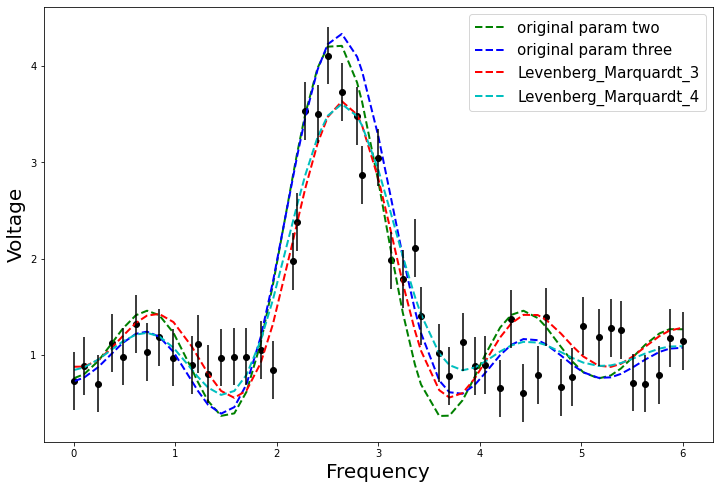

In [350]:
fig, ax = plt.subplots(1, 1, figsize = (12, 8))

ax.plot(fig_11_6_frame["frequency"], fig_11_6_frame["voltage"], "ko")

plt.plot(fig_11_6_frame["frequency"], original_sine_two, \
         'g--', linewidth=2, label='original param two')

plt.plot(fig_11_6_frame["frequency"], original_sine_three, \
         'b--', linewidth=2, label='original param three')

plt.plot(fig_11_6_frame["frequency"], sine_sig_two, \
         'r--', linewidth=2, label='Levenberg_Marquardt_3')

plt.plot(fig_11_6_frame["frequency"], sine_sig_three, \
         'c--', linewidth=2, label='Levenberg_Marquardt_4')

ax.set_xlabel("Frequency", fontsize = 20)
ax.set_ylabel("Voltage", fontsize = 20)

ax.errorbar(fig_11_6_frame["frequency"], fig_11_6_frame["voltage"], \
            fig_11_6_frame["voltage_std"],  linestyle =" ", ecolor = "k")

ax.legend(fontsize = 15)

## Asymptotic covariance matrix 

The parameter errors can be found by taking the square root of the diagonal elements of the asymptotic covariance matrix which is the equivalent of parameter covariance matrix ($\Psi^{-1}$) in linear problems (read section 10.5.3 and see eq. 10.104, 105, 106). Here, in non-linear problems, we can the asymptotic covariance matrix by inverting the curvature matrix (see eq.11.30 and 11.41). Note that this step has to be done after the model has converged to the best set of parameters (i.e. at lowest chi-square value). Before we take the square root of the diagonal elements of the asymptotic covariance matrix we need to multiply them by the coefficient ___k___ to make the error measurements more robust (see eq. 11.42). To find the value of ___k___ we use eq. 10.144. Once found we multiply the elements of the asymptotic covariance matrix by the ___k___ coefficient and then take the square root of the diagonal elements of the matrix (similar to the linear problems). Note that as it is explained on page 305, Mathematica multiplies the asymptotic covariance matrix by a factor of $k^2$ not $k$. So I follow the same procedure and muultiply the asymptotic covariance matrix by a factor of $k^2$ (I will not take the square root of the $k$ coefficient as is provided in eq.10.144.

In [358]:
asymptotic_covariance_matrix = torch.inverse(curvature_matrix)
asymptotic_covariance_matrix

tensor([[ 0.0026, -0.0029,  0.0004, -0.0038, -0.0005],
        [-0.0029,  0.0758,  0.0129, -0.0554,  0.0350],
        [ 0.0004,  0.0129,  0.0038, -0.0163,  0.0075],
        [-0.0038, -0.0554, -0.0163,  0.0872, -0.0324],
        [-0.0005,  0.0350,  0.0075, -0.0324,  0.0205]])

In [370]:
# Accroding to eq. 10.144 (but without the square root)
# 53.8093 is our lowest chi-square value after convergence to the best set of parameters
# N - M = 51 - 5 = 46

k_coefficient = torch.Tensor([53.8084/(46)])
k_coefficient

tensor([1.1697])

In [371]:
parameter_error = torch.sqrt(torch.diagonal(k_coefficient * asymptotic_covariance_matrix))
parameter_error

tensor([0.0555, 0.2979, 0.0663, 0.3193, 0.1550])

## Bayes factor and the Laplace approximation (only for the second model)
When it comes to deciding which model is the best amongst several competing models one can use the ___odds ratio___ (see eq. 3.29. Also, see above (___Part d: Odds ratio___) in this notebook). We assume the prior probability of both models are the same so all we need to do is to calculate the Bayes factor which is the ratio of the likelihood function of model 1 to model 2. Here we only calculate the likelihood of model 2 (see eq. 11.40). Note that according to eq. 11.40 we assume the prior range for the parameters are known to within a factor of three (i.e. 2.667 $\theta_{\alpha}$). Also, note that here break eq.11.40 into several terms and code each term separately and then just multiply them all together. This way it would be easier to follow what is happening! Note that here at the fourth term where I need to indicate the $(det$ $I)^{\small\frac{1}{2}}$ I am only using the sqrt of the main diagonal elements of the curvature matrix that is NOT multiplied by the ___$k^2$___ coefficient!

In [383]:
prior_range    = 2.667
sigma          = 0.3
N              = 51
M              = 5
chi_square_min = 53.8084


first_term  = torch.Tensor([1/((0.9961 * prior_range) * (2.4053 * prior_range) * (2.5185 * prior_range) \
                            * (0.9412 * prior_range) * (3.1879 * prior_range))])
print("first ", first_term)
second_term = torch.Tensor([1/((sigma**N) * (6.28**(0.5*N)))])
print("second ", second_term)

third_term  = torch.exp(torch.Tensor([-0.5 * chi_square_min])) * torch.Tensor([6.28** (0.5*M)])
print("third ", third_term)

fourth_term = torch.sqrt(torch.det(asymptotic_covariance_matrix))
print("fourth ", fourth_term)

model_2_likelihood = first_term * second_term * third_term * fourth_term
model_2_likelihood

first  tensor([0.0004])
second  tensor([2083747.5000])
third  tensor([2.0443e-10])
fourth  tensor(3.1440e-06)


tensor([5.4824e-13])

## Marginal and projected distributions (not accomplished! Not sure why! Read below)

According to section 11.6.2, we keep parameter ___a2___ fixed (with a defualt value of 0.5) and let the other parameter to change freely. In order to do so, we need to make some changes to the original functions as shown below.

In [101]:
# https://www.khanacademy.org/math/multivariable-calculus/applications-of-multivariable-derivatives/quadratic-approximations/a/the-hessian
def chi_square_two_a2_fixed(model_param, fixed_param, predictor = torch.from_numpy(fig_11_6_frame["frequency"].values), \
                        observed_data = torch.from_numpy(fig_11_6_frame["voltage"].values), std = 0.3):
    """This function calculates the Chi-square statistics for a given set of predicted data, 
    their observed counterpart, and their variance."""
    predicted_data = model_param[0] + model_param[1] * torch.sin(6.28 * \
                        (predictor - model_param[2])/1.5)/(6.28 * (predictor - model_param[2])/ 1.5) + \
                        fixed_param * torch.sin(6.28 * \
                        (predictor - model_param[3])/1.5)/(6.28 * (predictor - model_param[3])/ 1.5)
    
    
    return (((observed_data - predicted_data)/std)**2).sum()

In [102]:
def curvature_matrix_two_a2_fixed(parameter_array, a2_param):
    """Note that Hessian matrix is just twice the curvature matrix (see page 299)."""
    curvature   = 0.5 * torch.autograd.functional.hessian(chi_square_two_a2_fixed, (parameter_array, \
                                                                    torch.Tensor([a2_param])))[0][0]
    return curvature

In [103]:
def jacobian_matrix_two_a2_fixed(parameter_array, a2_param):
    """Note that Jacobian matrix has a vector format output with dimensions [1, n] where n is the number of 
    input parameters parameteres. See eq 15.5.8 of NR book!"""
    jacobian    = -0.5 * torch.autograd.functional.jacobian(chi_square_two_a2_fixed, (parameter_array, \
                                                                    torch.Tensor([a2_param])))[0]
    
    return jacobian

In [104]:
def lambda_curvature_matrix(curvature_matrix, lambda_value):
    
    lambda_tensor = torch.Tensor([lambda_value])

    # extracting diagonal elements of the curvature matrix
    curvature_diagonal    = torch.diagonal(curvature_matrix)

    # multiplying lambda by curvature matrix and building the diagonal matrix
    lambda_curve_diagonal = torch.diag(curvature_diagonal * lambda_tensor)
    # building the final matrix according to eq. 15.5.13 of NR.
    final_curvature = curvature_matrix + lambda_curve_diagonal

    return final_curvature

In [105]:
def parameter_array_update_two_a2_fixed(final_curvature_matrix, jacobian_matrix, parameter_array):
    
    summed_curvature = torch.sum(final_curvature_matrix, 1)
    
    param_0          = parameter_array[0] + jacobian_matrix[0]/summed_curvature[0]
    param_1          = parameter_array[1] + jacobian_matrix[1]/summed_curvature[1]
    param_2          = parameter_array[2] + jacobian_matrix[2]/summed_curvature[2]
    param_3          = parameter_array[3] + jacobian_matrix[3]/summed_curvature[3]

#     print("Delta ---> ", jacobian_matrix/summed_curvature)
    new_param_array  = torch.Tensor([param_0, param_1, param_2, param_3])
    
    return new_param_array

In [106]:
def levenberg_marquardt_two_a2_fixed(input_observed_data, input_predictor, parameter, fixed_a2 = 0.5, \
                                     initial_lambda = 0.001):
    
    chi_square_value_current = chi_square_two_a2_fixed(parameter, fixed_a2, predictor = input_predictor, \
                                                 observed_data = input_observed_data, std = 0.3)
    chi_square_value_old = chi_square_value_current
    modified_param_array = parameter
    lambda_coefficient   = initial_lambda

    chi_diff = 10.
    
    while chi_diff > 0.001:
        curv_matrix          = curvature_matrix_two_a2_fixed(modified_param_array, fixed_a2)

        jacob_matrix         = jacobian_matrix_two_a2_fixed(modified_param_array, fixed_a2)

        built_lambd_curv     = lambda_curvature_matrix(curv_matrix, lambda_coefficient)
        
        # We keep the parametr of interest constant!
        new_paramters        = parameter_array_update_two_a2_fixed(built_lambd_curv, jacob_matrix,\
                                                                   modified_param_array)

        chi_square_value_new = chi_square_two_a2_fixed(new_paramters, fixed_a2, predictor = input_predictor, \
                                                     observed_data = input_observed_data, std = 0.3)

#         print("chis ---> ", chi_square_value_old, chi_square_value_new, new_paramters)
        if chi_square_value_new >= chi_square_value_old:
            lambda_coefficient   = 10.0 * lambda_coefficient
#             print("ga ===> ", lambda_coefficient)
        elif chi_square_value_new < chi_square_value_old:

            lambda_coefficient   = lambda_coefficient/10.0
#             print("l ===> ", lambda_coefficient)
            modified_param_array = new_paramters

#         if lambda_coefficient <= 0.01:
#             lambda_coefficient = 0.01
        # Termination condition!!!
        chi_diff = abs(chi_square_value_old - chi_square_value_new)
        
#         if chi_square_value_new < 156.5:
#             lambda_coefficient   = lambda_coefficient/20.
#             print("********* Done **********")
# #         print("diff ->")
        
        chi_square_value_old = chi_square_value_new
    print(chi_square_value_new, chi_diff)
    return new_paramters, curv_matrix, chi_square_value_new

In [107]:
chi_square_min_list = []
curve_matrix        = []

param_array_two     = torch.Tensor([1.2, 3., 1., 3.5])

count      = 0
start_time = time.time()
for a2_param in numpy.arange(0.4, 2.5, 0.02):
   
    test_param, curvature_matrix, min_chi_square = levenberg_marquardt_two_a2_fixed(torch.from_numpy(fig_11_6_frame["voltage"].values), \
                        torch.from_numpy(fig_11_6_frame["frequency"].values), \
                        param_array_two, fixed_a2 = a2_param)
    
    chi_square_min_list.append(min_chi_square)
    curve_matrix.append(curvature_matrix)
    
    print("loop ---> ", count)
    count += 1

print("Took ---> ", time.time() - start_time) 

tensor(490.4945, dtype=torch.float64) tensor(3.8490e-06, dtype=torch.float64)
loop --->  0
tensor(488.5092, dtype=torch.float64) tensor(6.4463e-07, dtype=torch.float64)
loop --->  1
tensor(493.6203, dtype=torch.float64) tensor(0., dtype=torch.float64)
loop --->  2
tensor(494.9065, dtype=torch.float64) tensor(0., dtype=torch.float64)
loop --->  3
tensor(497.5208, dtype=torch.float64) tensor(0., dtype=torch.float64)
loop --->  4
tensor(500.3658, dtype=torch.float64) tensor(0., dtype=torch.float64)
loop --->  5
tensor(503.5794, dtype=torch.float64) tensor(0., dtype=torch.float64)
loop --->  6
tensor(506.8578, dtype=torch.float64) tensor(0., dtype=torch.float64)
loop --->  7
tensor(510.1819, dtype=torch.float64) tensor(0., dtype=torch.float64)
loop --->  8
tensor(513.5576, dtype=torch.float64) tensor(0., dtype=torch.float64)
loop --->  9
tensor(516.9714, dtype=torch.float64) tensor(0., dtype=torch.float64)
loop --->  10
tensor(555.3931, dtype=torch.float64) tensor(0.0002, dtype=torch.float

tensor(987.3214, dtype=torch.float64) tensor(0., dtype=torch.float64)
loop --->  96
tensor(993.2093, dtype=torch.float64) tensor(0., dtype=torch.float64)
loop --->  97
tensor(1000.2852, dtype=torch.float64) tensor(0., dtype=torch.float64)
loop --->  98
tensor(1008.0921, dtype=torch.float64) tensor(0., dtype=torch.float64)
loop --->  99
tensor(1017.8937, dtype=torch.float64) tensor(0., dtype=torch.float64)
loop --->  100
tensor(1017.6297, dtype=torch.float64) tensor(0., dtype=torch.float64)
loop --->  101
tensor(1028.9611, dtype=torch.float64) tensor(0., dtype=torch.float64)
loop --->  102
tensor(1027.8020, dtype=torch.float64) tensor(0.0010, dtype=torch.float64)
loop --->  103
tensor(2130.0677, dtype=torch.float64) tensor(0.0008, dtype=torch.float64)
loop --->  104
Took --->  31.672881364822388


Now we find the values of the profile/projected and mariginal (Laplacian approximated) functions accroding to equations 11.17 (for marginal distribution) and 11.46 (for projected/profile distribution). Note that we need to calculate the projected and marginal distributions one-at-a-time for each value of the ___a2___ parameter. First, we need to find the value of the $\hat{k}$ parameter. This parameter is the same as the ___k___ parameter above calculated using eq.10.144 except that here we need to calculate $\hat{k}$ for every single value of the ___a2___ parameter. Also, note that we still reserve the value of ___k = 1.1697___ as this is the correction term we calculated when all five parameters were free! Note that here ___M___ the number of free parameters is 4 so ___N -M = 47___.Once, we have calculated all the $\hat{k}$ values we find the projected distribution and once the projected distribution has been calculated we simply muliply that by the $(det$ $I(a2))^{\small\frac{1}{2}}$ to find the marginal distribution according to eq. 11.17.

In [112]:
k_hat = []
for chi_sq in chi_square_min_list:
    # Note that we have M = 4 => N - M = 51 - 4 = 47
    k_hat.append(torch.Tensor([chi_sq/(47)]))

In [113]:
# profile distribution according to eq. 11.44 and 11.46

projected_list           = []
corrected_projected_list = []
for i in range(len(chi_square_min_list)):
    
    projected_out               = torch.exp(- chi_square_min_list[i]/2)              # Eq. 11.44
    
    # note that for marginal distribution we should use eq. 11.46 to calculate the profile distribution.
    corrected_projected_out     = torch.exp(- chi_square_min_list[i]/(2 * k_hat[i])) # Eq. 11.46

    projected_list.append(projected_out)
    corrected_projected_list.append(corrected_projected_out)

In [114]:
max(projected_list)

tensor(4.9104e-17, dtype=torch.float64)

In [115]:
max(corrected_projected_list)

tensor([6.2242e-11])

Unfortunately, I was not able to get correct results for the last part (i.e. projected and marginal distribution of the ___a2___ parameter. The problem is that most of my $\chi^2_{min}$ values (for different itterations of the ___a2___ parameter) are too large which in turn make the projected distribution (eq. 11.44) way too small and, accordingly, the marginal distribution becomes too small which is differnt from the results we see in ___fig. 11.9___. As you can see for both profiles distribution the maximum value is far smaller than what we see on the ___y axis___ of ___fig. 11.9___. However, looking closer at the maximum value of the corrected profile (which approximately is ___6.2242e-11___) seems to have the right coefficient (6.2242) but wrong power (e-11). This bring the proportionality sign of the equations 11.44 and 11.46. Both these equations show that profile function (distribution) is proportional (not equal) to the terms on the right hand side. The question is, does fig. 11.9 represent proportionality or equality of these equations? In other words, do I need to simply multiply/divide my projected valuese by a factor so I can reproduce the range of values on the ___y axis___ of the figure 11.9? If so, what is the constant/coefficient? If we are talking about some sort of normalization constant, then I have to divide my projected values with a number that is way bigger that any single of them (that is how normalization constant works) so we will end up with a list even smaller numbers! I am not sure what to do here! The other confusing point about fig. 11.9 and my results is that when we compare the result of the $\chi^2_{min}$ value on fig. 11.8 which is 30.2362 it is not that far from my result which is 53.8084. Note that both of these results (the one from the book and mine) are the minimum value of the $\chi^2_{min}$ when all five parameters are free and can change! So this means that for the case of different fixed ___a2___ values $\chi^2_{min}$ will be even larger! This means that the projected distribution in figure 11.9 must be much smaller than the range of ___y___ axis since accroding to eq. 11.44 exponential is raised to the power of $\sim \frac{-30}{2}$ and even smaller negative numbers. (Remember 30.236 is the minimum value achieved for $\chi^2_{min}$ when all five parameters are free to change.) The only possible exaplanation I have is that in eq. 11.44 we can see the proportionality sign and NOT equality sign. So, I'd imagine that what ever is the result of this equation it is multiplied by some constant to get the values we see in fig. 11.9. 

# Chapter 12

## Reproducing figure 12.1 (a)

Note that after implementing the steps in example one and running the code I noticed that the ___y___ value can beocome negative which would terminate the process as there is no negative factorial! The book does not tell anyting about that so I added one more ___if___ statement so every time the value of ___y___ drops below zero I set is to 0. There does not seem to be anything wrong with my implementation of the code as looking at plot ___b___ of figure 12.1 one can see that there is good chance of getting values below zero out of a Poisson distribution with $\lambda = 3$. The only confusing point is that how come the book does not say anything about it in the implementation steps!

In [2]:
import math
from scipy.stats import uniform

In [232]:
def metropolis_ratio(param_lambda, y, sample_x):

    r = (param_lambda**(y - sample_x)) * (math.factorial(sample_x)/math.factorial(y))
    
    return r

In [226]:
def metropolis_hastings(param_lambda, initial_sample_x, number_of_sample):
    
    x_t = int(initial_sample_x)
    
    sample_list = []
    t           = 0
    while t < number_of_sample:
        # step one 
        u_1 = uniform.rvs(size=1)

        # step two
        if u_1 > 0.5:
            y = x_t + 1

        else:
            y = x_t - 1
            
        # Intermediory step!
        if y < 0:
            y = 0

        # step three
        r = metropolis_ratio(param_lambda, y, x_t)

        # step four
        u_2 = uniform.rvs(size=1)

        if u_2 <= r:
            x_t_1 = y
            
        else:
            x_t_1 = x_t

        
        # appending generated samples
        sample_list.append(x_t)
        
        # replacing old value with the new one
        x_t = x_t_1
        
        # incrementing t
        t += 1
        
    return sample_list

In [227]:
lambda_three = metropolis_hastings(3, 10, 1000)
# lambda_three

Text(0, 0.5, 'X')

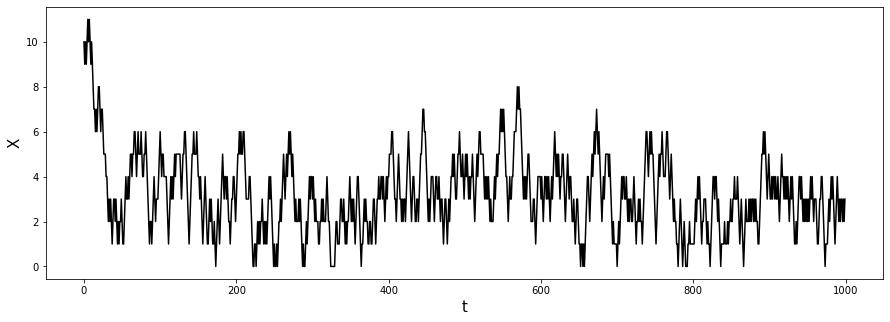

In [231]:
fig, ax = plt.subplots(1, 1, figsize = (15, 5))


ax.plot(range(1000), lambda_three, "k-")

ax.set_xlabel("t", fontsize = 15)
ax.set_ylabel("X", fontsize = 15)

# Reproducing the results of example 2; page 316

In [157]:
def bivariate_normal_distribution(x_one, x_two, mu_one, mu_two, variane_one, variance_two, corr):
    
    sigma_one = numpy.sqrt(variane_one)
    
    sigma_two = numpy.sqrt(variance_two)
    
    coeff  = 1/(6.28 * sigma_one * sigma_two * numpy.sqrt(1 - corr**2))
        
    power = (-1/(2 * (1 - corr**2))) * (((x_one - mu_one)/sigma_one)**2 - 2 * corr * ((x_one - mu_one)/sigma_one) * \
                                       ((x_two - mu_two)/sigma_two) + ((x_two - mu_two)/sigma_two)**2)

    final = coeff * numpy.exp(power)
    
    return final

In [158]:
def current_parameter(x_one, x_two, mu_one_target = 0.0, mu_two_target = 0.0, mu_three_target = 4.0, \
                                    mu_four_target = 0.0, variance_one_target=1., variance_two_target = 1.,\
                                    variance_three_target=2., variance_four_target=2., \
                                    corr_one_target = 0, corr_two_target = 0.4):
    
    bivariate_normal_one  = bivariate_normal_distribution(x_one, x_two, mu_one_target, mu_two_target, \
                                                         variance_one_target, variance_two_target,\
                                                         corr_one_target)
    
    bivariate_normal_two  = bivariate_normal_distribution(x_one, x_two, mu_three_target, mu_four_target, \
                                                         variance_three_target, variance_four_target,\
                                                         corr_two_target)
    
    target_distribution   = 0.5 * (bivariate_normal_one + bivariate_normal_two)
        
    return target_distribution

In [188]:
def metropolis_hastings_example_two(initial_x_one, initial_x_two, variance_propose, number_of_sample):
    
    # initial value assignment.
    x_1_propose   = initial_x_one
    x_2_propose   = initial_x_two
    
    current_x_one = initial_x_one
    current_x_two = initial_x_two

    
    sample_x_one_list   = []
    sample_x_two_list   = []
    accepted_count_list = []
    t = 0
    while t < number_of_sample:
        # Step one_part a: generate two proposal values
        proposal_cov   = [[variance_propose, 0], [0, variance_propose]]
        proposal_mean  = (x_1_propose, x_2_propose)
        
        proposed_value_1, proposed_value_2 = numpy.random.multivariate_normal(proposal_mean, proposal_cov)

        # Step two: decide whether accpet or reject the proposed value.
        
        # step two_part a: find the probability of the current parameter given the target distribution
        current_param_prob  = current_parameter(current_x_one, current_x_two)
        
        # step two_part b: find the probability of the proposed parameter parameter given the target distribution
        proposed_param_prob = current_parameter(proposed_value_1, proposed_value_2)
        
        # Step two_part c: find the ratio of the proposed to the current probabilities.
        p_move = proposed_param_prob/current_param_prob
        
        # step two_part d: random number generation froma a uniform distribution
        random_number = uniform.rvs(size=1)[0]
        
        # step two_e: this is where the decision is executed.
        if  random_number <= min(1, p_move): # If this condition is met accept the proposed value.
            current_x_one = proposed_value_1
            current_x_two = proposed_value_2
            
            x_1_propose   = current_x_one
            x_2_propose   = current_x_two
            
            accepted_count_list.append(1)
        else:
            pass
                
        # appending generated samples
        sample_x_one_list.append(current_x_one)
        sample_x_two_list.append(current_x_two)

        # incrementing t
        t += 1
        
    return sample_x_one_list, sample_x_two_list, sum(accepted_count_list)/number_of_sample

In [189]:
sample_x1_variance_one, sample_x2_variance_one, acceptance_ratio_one = metropolis_hastings_example_two(-4.5, \
                                                                        4.5, 1, 8000)

### Finding the contours

In [163]:
delta = 0.001
x = numpy.arange(-3.0, 7.0, delta)
y = numpy.arange(-4.0, 4.0, delta)
X, Y = numpy.meshgrid(x, y)
Z    = current_parameter(X, Y)

### Finding the marginal distribution of X1 and X2

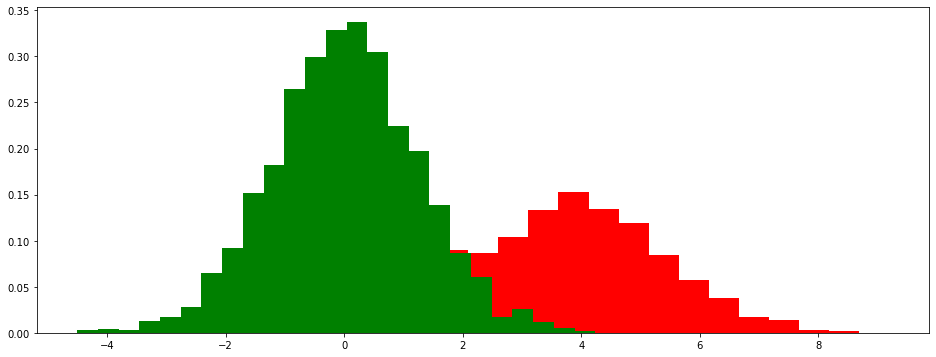

In [164]:
fig, ax = plt.subplots(1,1,figsize=(16, 6))
x1_hist = ax.hist(sample_x[50:], bins=25, density=True, color = "r", alpha = 1)
x2_hist = ax.hist(sample_y[50:], bins=25, density=True, color = "g", alpha = 1)


## Figure 12.2; page 317

(-4.0, 4.0)

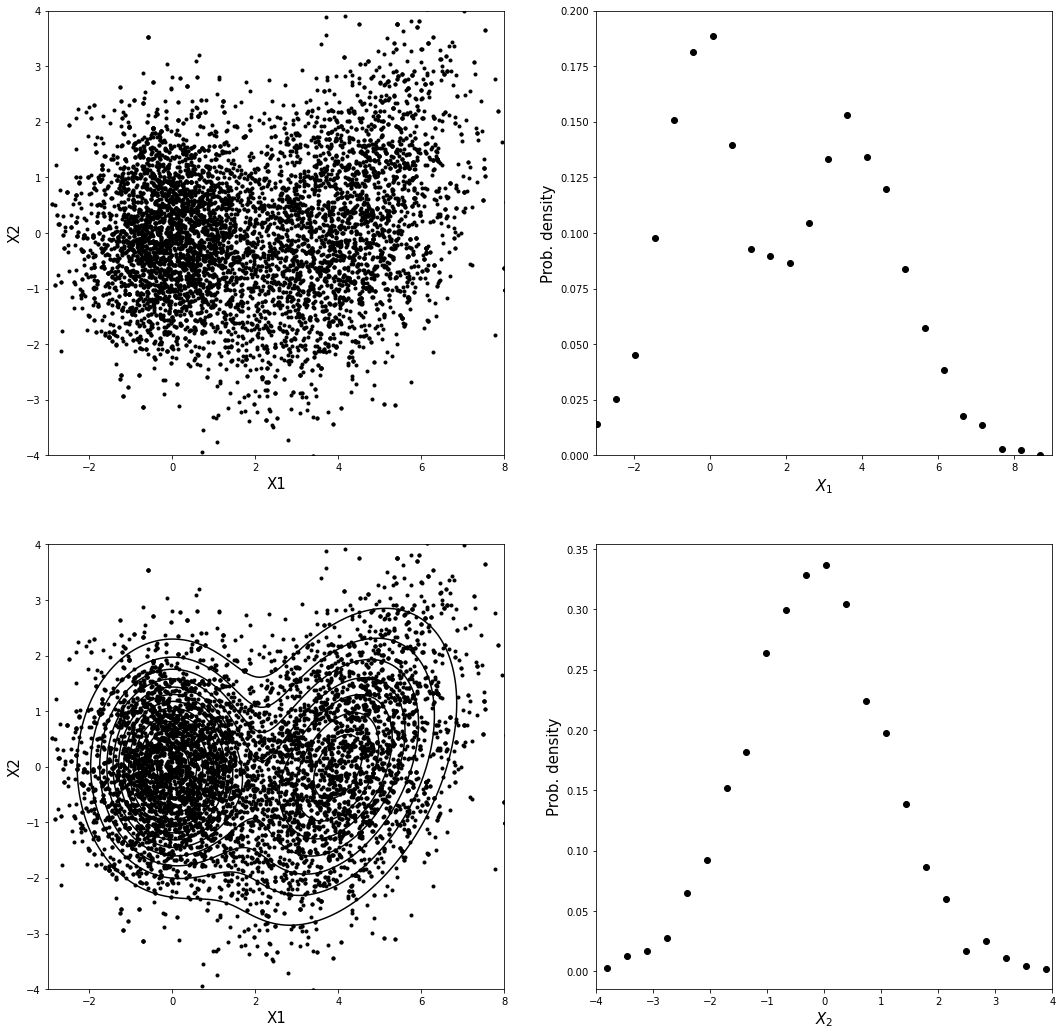

In [167]:
fig, ax = plt.subplots(2, 2, figsize = (18, 18))

ax[0,0].plot(sample_x1_var_one[50:], sample_x2_var_one[50:], "ko", markersize = 3)

ax[1,0].plot(sample_x1_var_one[50:], sample_x2_var_one[50:], "ko", markersize = 3)
ax[1,0].contour(X, Y, Z, numpy.linspace(Z.min(), Z.max(), 15), colors='k')

ax[0,1].plot(x1_hist[1][:-1], x1_hist[0], "ko")
ax[0,1].set_xlabel("$X_1$", fontsize = 15)
ax[0,1].set_ylabel("Prob. density", fontsize = 15)


ax[1,1].plot(x2_hist[1][:-1], x2_hist[0], "ko")
ax[1,1].set_xlabel("$X_2$", fontsize = 15)
ax[1,1].set_ylabel("Prob. density", fontsize = 15)


ax[0,0].set_xlabel("X1", fontsize = 15)
ax[0,0].set_ylabel("X2", fontsize = 15)

ax[0,0].set_xlim(-3,8)
ax[0,0].set_ylim(-4,4)

ax[1,0].set_xlabel("X1", fontsize = 15)
ax[1,0].set_ylabel("X2", fontsize = 15)

ax[1,0].set_xlim(-3,8)
ax[1,0].set_ylim(-4,4)

ax[0,1].set_xlim(-3,9)
ax[0,1].set_ylim(0, 0.2)


ax[1,1].set_xlim(-4,4)

## Reproducing figure 12.3

In [191]:
sample_x1_variance_one_tenth, sample_x2_variance_one_tenth, acceptance_ratio_one_tenth = \
                                    metropolis_hastings_example_two(-4.5, 4.5, 0.1, 8000)

sample_x1_variance_ten, sample_x2_variance_ten, acceptance_ratio_ten = \
                                    metropolis_hastings_example_two(-4.5, 4.5, 10, 8000)

In [192]:
print(acceptance_ratio_one_tenth)
print(acceptance_ratio_one)
print(acceptance_ratio_ten)

0.883875
0.639375
0.263875


(-5.0, 5.0)

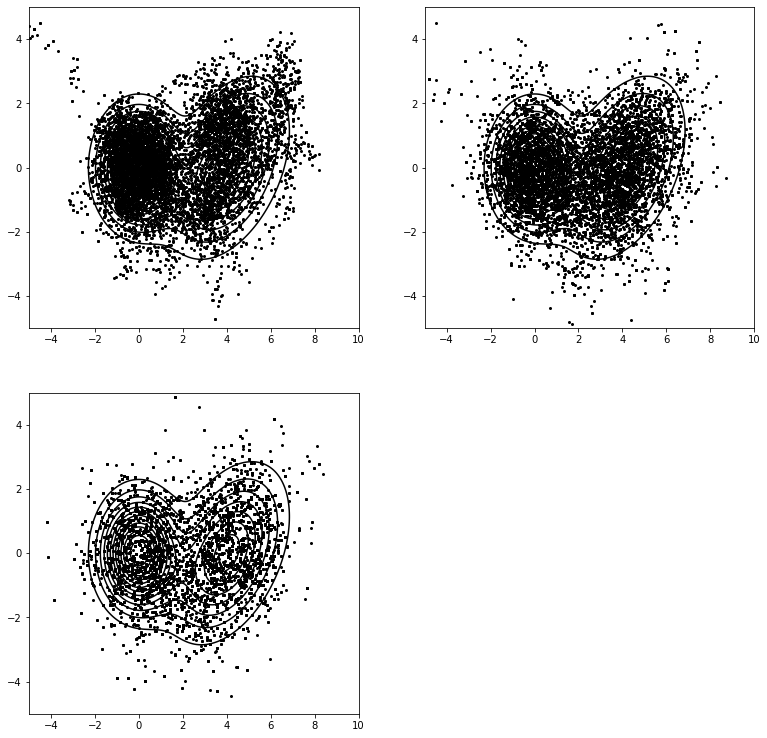

In [174]:
fig, ax = plt.subplots(2, 2, figsize = (13, 13))

ax[0,0].plot(sample_x1_variance_one_tenth, sample_x2_variance_one_tenth, "ko", markersize = 2)
ax[0,0].contour(X, Y, Z, numpy.linspace(Z.min(), Z.max(), 15), colors='k')

ax[0,1].plot(sample_x1_variance_one, sample_x2_variance_one, "ko", markersize = 2)
ax[0,1].contour(X, Y, Z, numpy.linspace(Z.min(), Z.max(), 15), colors='k')

ax[1,0].plot(sample_x1_variance_ten, sample_x2_variance_ten, "ko", markersize = 2)
ax[1,0].contour(X, Y, Z, numpy.linspace(Z.min(), Z.max(), 15), colors='k')

ax[1, 1].remove()

ax[0,0].set_xlim(-5,10)
ax[0,0].set_ylim(-5,5)

ax[0,1].set_xlim(-5,10)
ax[0,1].set_ylim(-5,5)

ax[1,0].set_xlim(-5,10)
ax[1,0].set_ylim(-5,5)

## Autocorrelation function (figure 12.4)

In [139]:
def autocorrelation_function(input_array):
    
    mean_value  = input_array.mean()
    output_auro_corr_list = []
    for lag in range(1, 300): # input_array.size - 1
    #     print("lag ---> ", lag)
        lagged_array     = input_array[lag:]
        numerator_list   = []
        denom_first_list = []
        denom_second_list= []
        for i in range(lagged_array.size):
            numerator    = (input_array[i] - mean_value) * (lagged_array[i] - mean_value)
    #         print("input and lagged array ===> ", input_array[i], lagged_array[i])

            denom_first  = (input_array[i] - mean_value)**2
            denom_second = (lagged_array[i] - mean_value)**2

            numerator_list.append(numerator)

            denom_first_list.append(denom_first)
            denom_second_list.append(denom_second)

        final_lag = sum(numerator_list)/(numpy.sqrt(sum(denom_first_list)) * numpy.sqrt(sum(denom_second_list)))
#             final_lag = sum(numerator_list)/sum(denom_first_list)

    #     print("this is the final lag ---> ", final_lag)
        output_auro_corr_list.append(final_lag)
        print("lag ---> ", lag)
    return output_auro_corr_list
    

In [186]:
start = time.time()
x1_auto_variance_one_tenth_book = autocorrelation_function(numpy.array(sample_x1_variance_one_tenth[50:]))
print("Done with the first one!")
x1_auto_variance_one_book       = autocorrelation_function(numpy.array(sample_x1_variance_one[50:]))
print("Done with the second one!")
x1_auto_variance_one_ten_book   = autocorrelation_function(numpy.array(sample_x1_variance_ten[50:]))

end   = time.time()
print("Duration: ", end - start)

lag --->  1
lag --->  2
lag --->  3
lag --->  4
lag --->  5
lag --->  6
lag --->  7
lag --->  8
lag --->  9
lag --->  10
lag --->  11
lag --->  12
lag --->  13
lag --->  14
lag --->  15
lag --->  16
lag --->  17
lag --->  18
lag --->  19
lag --->  20
lag --->  21
lag --->  22
lag --->  23
lag --->  24
lag --->  25
lag --->  26
lag --->  27
lag --->  28
lag --->  29
lag --->  30
lag --->  31
lag --->  32
lag --->  33
lag --->  34
lag --->  35
lag --->  36
lag --->  37
lag --->  38
lag --->  39
lag --->  40
lag --->  41
lag --->  42
lag --->  43
lag --->  44
lag --->  45
lag --->  46
lag --->  47
lag --->  48
lag --->  49
lag --->  50
lag --->  51
lag --->  52
lag --->  53
lag --->  54
lag --->  55
lag --->  56
lag --->  57
lag --->  58
lag --->  59
lag --->  60
lag --->  61
lag --->  62
lag --->  63
lag --->  64
lag --->  65
lag --->  66
lag --->  67
lag --->  68
lag --->  69
lag --->  70
lag --->  71
lag --->  72
lag --->  73
lag --->  74
lag --->  75
lag --->  76
lag --->  77
lag --->

lag --->  1
lag --->  2
lag --->  3
lag --->  4
lag --->  5
lag --->  6
lag --->  7
lag --->  8
lag --->  9
lag --->  10
lag --->  11
lag --->  12
lag --->  13
lag --->  14
lag --->  15
lag --->  16
lag --->  17
lag --->  18
lag --->  19
lag --->  20
lag --->  21
lag --->  22
lag --->  23
lag --->  24
lag --->  25
lag --->  26
lag --->  27
lag --->  28
lag --->  29
lag --->  30
lag --->  31
lag --->  32
lag --->  33
lag --->  34
lag --->  35
lag --->  36
lag --->  37
lag --->  38
lag --->  39
lag --->  40
lag --->  41
lag --->  42
lag --->  43
lag --->  44
lag --->  45
lag --->  46
lag --->  47
lag --->  48
lag --->  49
lag --->  50
lag --->  51
lag --->  52
lag --->  53
lag --->  54
lag --->  55
lag --->  56
lag --->  57
lag --->  58
lag --->  59
lag --->  60
lag --->  61
lag --->  62
lag --->  63
lag --->  64
lag --->  65
lag --->  66
lag --->  67
lag --->  68
lag --->  69
lag --->  70
lag --->  71
lag --->  72
lag --->  73
lag --->  74
lag --->  75
lag --->  76
lag --->  77
lag --->

### comparison of autocorrelation function for three different values of sigma for parameter X1

(-0.2, 1.0)

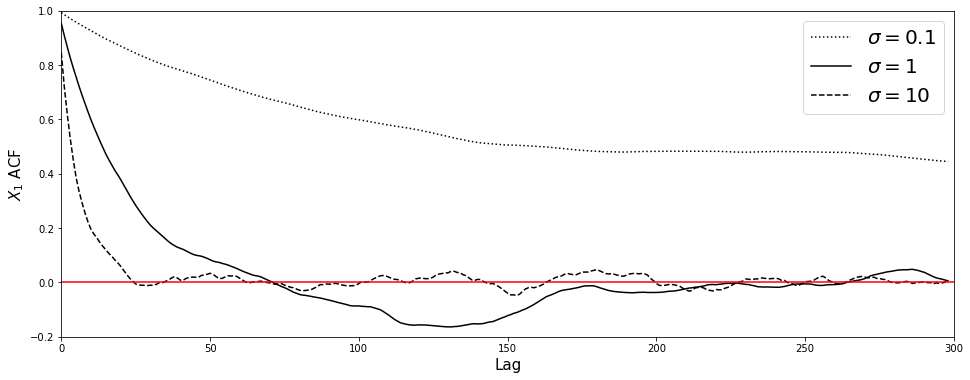

In [187]:
# https://www.google.com/search?q=autocorrelation+functions&source=lnms&tbm=isch&sa=X&ved=2ahUKEwjIi4TGjIH7AhWICBAIHUIkAWgQ_AUoAXoECAEQAw&biw=2560&bih=1304&dpr=1#imgrc=hBTIuuzgfmXfKM&imgdii=aPY-HrxoH2T05M
fig, ax = plt.subplots(1, 1, figsize = (16, 6))

ax.plot(range(299), x1_auto_variance_one_tenth_book, "k:")
ax.plot(range(299), x1_auto_variance_one_book, "k-")
ax.plot(range(299), x1_auto_variance_one_ten_book, "k--")

plt.hlines(y = 0.0, xmin = 0.0, xmax = 300, 
          ls='-', color = "r")

ax.set_xlabel("Lag", fontsize = 15)
ax.set_ylabel("$X_1$ ACF", fontsize = 15)

ax.legend(["$\sigma = 0.1$", "$\sigma = 1$", "$\sigma = 10$"], fontsize = 20)

ax.set_xlim(0,300)
ax.set_ylim(-0.2, 1)

### comparison of autocorrelation function for three different values of sigma for parameter X2

(-0.2, 1.0)

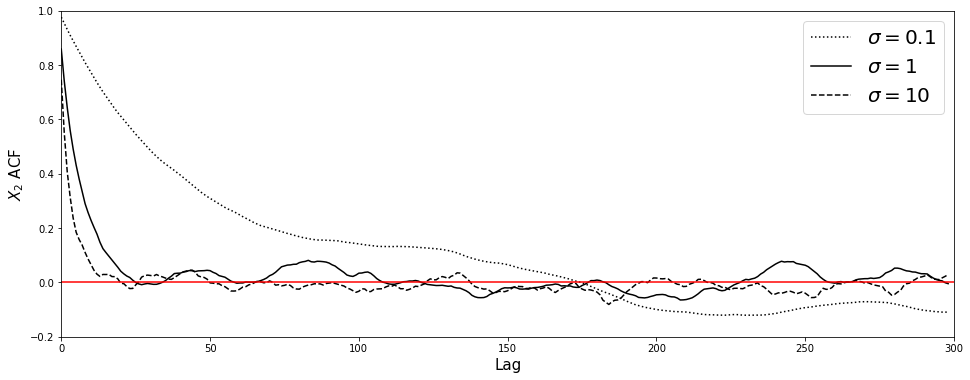

In [185]:
# https://www.google.com/search?q=autocorrelation+functions&source=lnms&tbm=isch&sa=X&ved=2ahUKEwjIi4TGjIH7AhWICBAIHUIkAWgQ_AUoAXoECAEQAw&biw=2560&bih=1304&dpr=1#imgrc=hBTIuuzgfmXfKM&imgdii=aPY-HrxoH2T05M
fig, ax = plt.subplots(1, 1, figsize = (16, 6))

ax.plot(range(299), x_2_auto_variance_one_tenth_book, "k:")
ax.plot(range(299), x_2_auto_variance_one_book, "k-")
ax.plot(range(299), x_2_auto_variance_one_ten_book, "k--")

plt.hlines(y = 0.0, xmin = 0.0, xmax = 300, ls='-', color = "r")

ax.set_xlabel("Lag", fontsize = 15)
ax.set_ylabel("$X_2$ ACF", fontsize = 15)

ax.legend(["$\sigma = 0.1$", "$\sigma = 1$", "$\sigma = 10$"], fontsize = 20)

ax.set_xlim(0, 300)
ax.set_ylim(-0.2, 1)

In the second plot (___X2___ parameter), there is some discrepency between what we see in figure 12.4 of the book and the of mine! Specially, in the beginning of the interval, drop in the corrlation factor of $\sigma = 10$ is faster than that of the $\sigma = 1$ which is not the case in the figure 12.4 of the book! I am not sure whether this is the result of the random nature of the MCMC method or if I've done something wrong! Also, it is clear that the dotted line of $\sigma = 0.1$ follows a different pattern than what we see in figure 12.4!

# The parts below are MCMC convergence diagnostic according to section 7.5 of the book "Doing Bayesian Data Analysis" (second edition)

## MCMC representativeness

### Trace plot (the first 500 iterations)

According to ... (section 7.5.1), for a trace plot it is better to generate more chains and see if they all overlap. Note that this does not mean that have to overlap over every single iterations! To achieve this I generated two more chaing with two different sets of initial values.

In [207]:
sample_x1_variance_one_trace1, sample_x2_variance_one_trace1, acceptance_ratio_one_trace1 = metropolis_hastings_example_two(0.0, \
                                                                        2.5, 1, 8000)

sample_x1_variance_one_trace2, sample_x2_variance_one_trace2, acceptance_ratio_one_trace2 = metropolis_hastings_example_two(-1.5, \
                                                                        -7.5, 1, 8000)

(-10.0, 510.0)

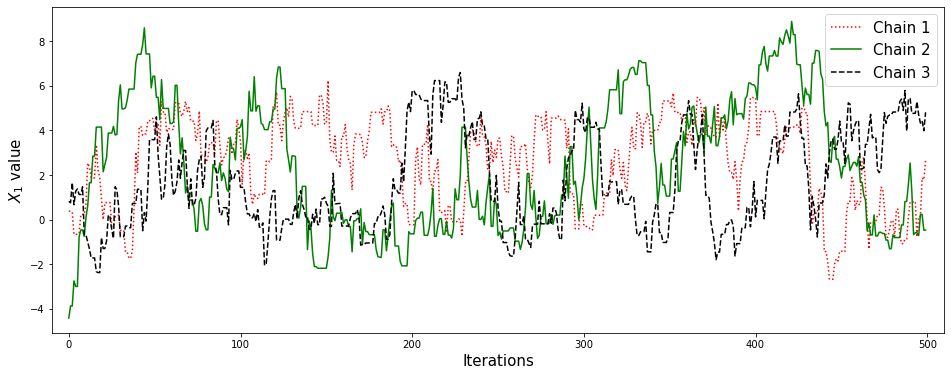

In [217]:
fig, ax = plt.subplots(1, 1, figsize = (16, 6))

ax.plot(range(500), sample_x1_variance_one_trace1[:500], "r:")
ax.plot(range(500), sample_x1_variance_one[:500], "g-")
ax.plot(range(500), sample_x1_variance_one_trace2[:500], "k--")

ax.set_xlabel("Iterations", fontsize = 15)
ax.set_ylabel("$X_1$ value", fontsize = 15)

ax.legend(["Chain 1", "Chain 2", "Chain 3"], fontsize = 15)

ax.set_xlim(-10, 510)

(-10.0, 510.0)

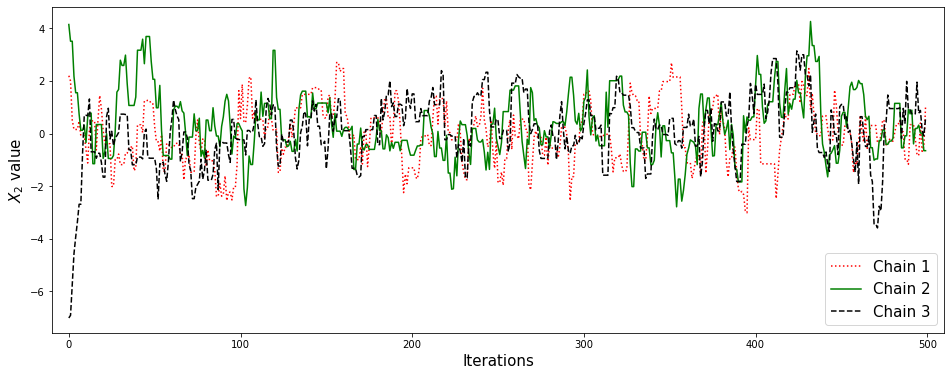

In [218]:
fig, ax = plt.subplots(1, 1, figsize = (16, 6))

ax.plot(range(500), sample_x2_variance_one_trace1[:500], "r:")
ax.plot(range(500), sample_x2_variance_one[:500], "g-")
ax.plot(range(500), sample_x2_variance_one_trace2[:500], "k--")

ax.set_xlabel("Iterations", fontsize = 15)
ax.set_ylabel("$X_2$ value", fontsize = 15)

ax.legend(["Chain 1", "Chain 2", "Chain 3"], fontsize = 15)

ax.set_xlim(-10, 510)

In case of my trace plots, it seems that the chains converge very rapidly (perhaps after 20 to 30 iterations). This suggest that the first few tens of iterations ___should___ be excluded because they are not representative. The iterations before the chaines coverge and overlap (i.e. unrepresnetative iterations) are called ___burn-in___ period. If you are intered you can visualise all the 8000 iterations! I did and it looks they all overlap just fine (but it'll be a messy plot).

## Smooth histogram (density plot)

In [219]:
import pandas

In [239]:
x_1_var_one_dic = {"chain1": sample_x1_variance_one_trace1, "chain2":sample_x1_variance_one, \
                  "chain3": sample_x1_variance_one_trace2}

x_2_var_one_dic = {"chain1": sample_x2_variance_one_trace1, "chain2":sample_x2_variance_one, \
                  "chain3": sample_x2_variance_one_trace2}

x1_var_one_df = pandas.DataFrame(x_1_var_one_dic)

x2_var_one_df = pandas.DataFrame(x_2_var_one_dic)
     
print(x1_var_one_df.head())

print(x2_var_one_df.head())

     chain1    chain2    chain3
0  0.372674 -4.416434  0.817139
1  0.377990 -3.878593  0.753888
2  0.336665 -3.878593  1.653217
3 -0.662745 -2.754070  0.664068
4 -0.662745 -3.001441  1.270700
     chain1    chain2    chain3
0  2.195043  4.141122 -7.008710
1  1.994486  3.505969 -6.907628
2  0.507615  3.505969 -5.709215
3  0.153413  2.170331 -4.571906
4  0.153413  1.548411 -3.934932


Text(0, 0.5, 'Density value')

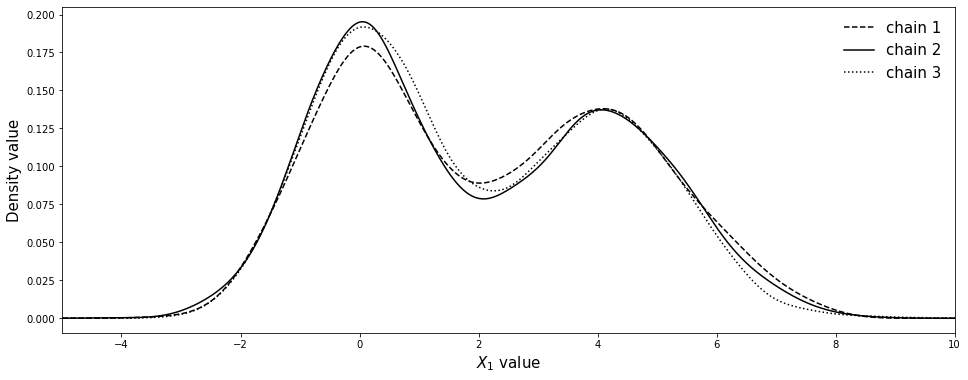

In [242]:
fig, ax = plt.subplots(1, 1, figsize = (16, 6))

x1_var_one_df['chain1'].plot.density(color='k', style = "--", alpha=1, ax=ax) 
x1_var_one_df['chain2'].plot.density(color='k', style = "-", alpha=1, ax=ax)
x1_var_one_df['chain3'].plot.density(color='k', style = ":", alpha=1, ax=ax)

ax.set_xlim(-5, 10)
ax.legend(labels=["chain 1", "chain 2", "chain 3"], frameon=False, fontsize = 15)

ax.set_xlabel("$X_1$ value", fontsize = 15)
ax.set_ylabel("Density value", fontsize = 15)

Text(0, 0.5, 'Density value')

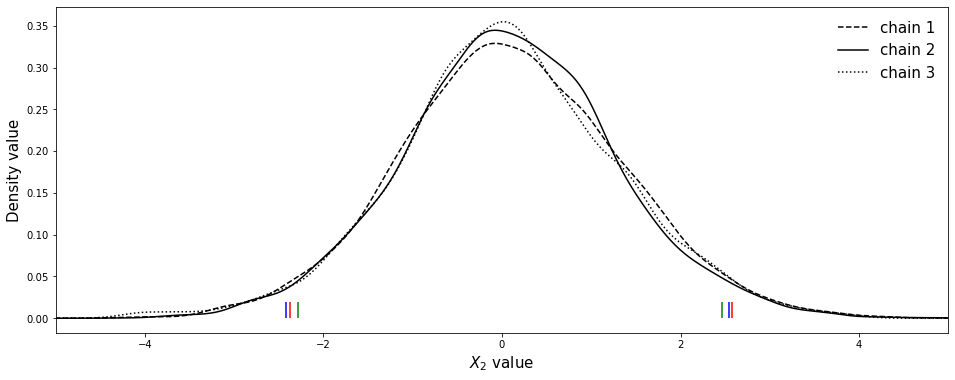

In [257]:
fig, ax = plt.subplots(1, 1, figsize = (16, 6))

x2_var_one_df['chain1'].plot.density(color='k', style = "--", alpha=1, ax=ax) 
x2_var_one_df['chain2'].plot.density(color='k', style = "-", alpha=1, ax=ax)
x2_var_one_df['chain3'].plot.density(color='k', style = ":", alpha=1, ax=ax)

mean_chain1 = x2_var_one_df['chain1'].mean()
mean_chain2 = x2_var_one_df['chain2'].mean()
mean_chain3 = x2_var_one_df['chain3'].mean()

sd_chain1 = x2_var_one_df['chain1'].std()
sd_chain2 = x2_var_one_df['chain2'].std()
sd_chain3 = x2_var_one_df['chain3'].std()

plt.vlines(x = mean_chain1 - 2*sd_chain1, ymin = 0.0, ymax = 0.02, ls='-', color = "r")
plt.vlines(x = mean_chain1 + 2*sd_chain1, ymin = 0.0, ymax = 0.02, ls='-', color = "r")

plt.vlines(x = mean_chain2 - 2*sd_chain2, ymin = 0.0, ymax = 0.02, ls='-', color = "g")
plt.vlines(x = mean_chain2 + 2*sd_chain2, ymin = 0.0, ymax = 0.02, ls='-', color = "g")

plt.vlines(x = mean_chain3 - 2*sd_chain3, ymin = 0.0, ymax = 0.02, ls='-', color = "b")
plt.vlines(x = mean_chain3 + 2*sd_chain3, ymin = 0.0, ymax = 0.02, ls='-', color = "b")

ax.set_xlim(-5, 5)
ax.legend(labels=["chain 1", "chain 2", "chain 3"], frameon=False, fontsize = 15)

ax.set_xlabel("$X_2$ value", fontsize = 15)
ax.set_ylabel("Density value", fontsize = 15)

Note that in the ___$X_2$___ above, the red, gree, and blue colours represent the ___High Density Interval___ (HDI) that contains $95\%$ of the $X_2$ parameter values for each of the chains. I assumed a normal distribution and that's why I simply added/subtracted twice the standard deviation of the data to/from their mean. The fact that HDI do not overlap os expected but they are close enough which is good sign. Note that in the larger the number of iterations the closer the HDI will be!

### Only for $X_2$ and only for the first 100 itereations to show the impact of burn-in period 

Text(0, 0.5, 'Density value')

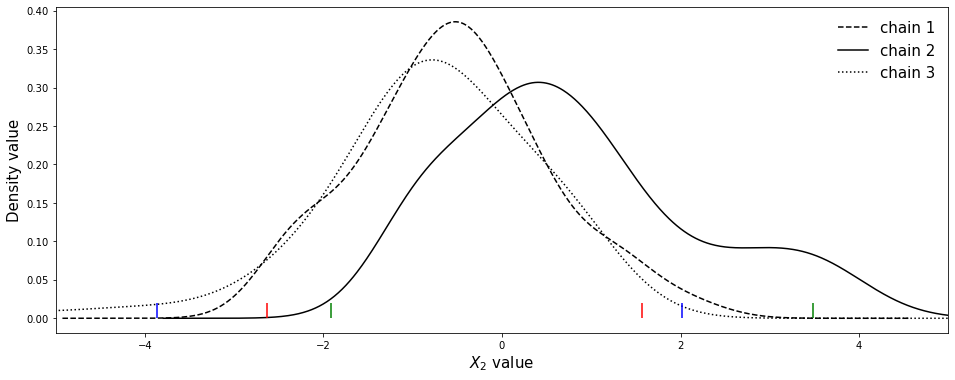

In [258]:
fig, ax = plt.subplots(1, 1, figsize = (16, 6))

x2_var_one_df['chain1'][:100].plot.density(color='k', style = "--", alpha=1, ax=ax) 
x2_var_one_df['chain2'][:100].plot.density(color='k', style = "-", alpha=1, ax=ax)
x2_var_one_df['chain3'][:100].plot.density(color='k', style = ":", alpha=1, ax=ax)

mean_chain1 = x2_var_one_df['chain1'][:100].mean()
mean_chain2 = x2_var_one_df['chain2'][:100].mean()
mean_chain3 = x2_var_one_df['chain3'][:100].mean()

sd_chain1 = x2_var_one_df['chain1'][:100].std()
sd_chain2 = x2_var_one_df['chain2'][:100].std()
sd_chain3 = x2_var_one_df['chain3'][:100].std()

plt.vlines(x = mean_chain1 - 2*sd_chain1, ymin = 0.0, ymax = 0.02, ls='-', color = "r")
plt.vlines(x = mean_chain1 + 2*sd_chain1, ymin = 0.0, ymax = 0.02, ls='-', color = "r")

plt.vlines(x = mean_chain2 - 2*sd_chain2, ymin = 0.0, ymax = 0.02, ls='-', color = "g")
plt.vlines(x = mean_chain2 + 2*sd_chain2, ymin = 0.0, ymax = 0.02, ls='-', color = "g")

plt.vlines(x = mean_chain3 - 2*sd_chain3, ymin = 0.0, ymax = 0.02, ls='-', color = "b")
plt.vlines(x = mean_chain3 + 2*sd_chain3, ymin = 0.0, ymax = 0.02, ls='-', color = "b")

ax.set_xlim(-5, 5)
ax.legend(labels=["chain 1", "chain 2", "chain 3"], frameon=False, fontsize = 15)

ax.set_xlabel("$X_2$ value", fontsize = 15)
ax.set_ylabel("Density value", fontsize = 15)

The significant deviation of the distributions from each other indicates that the chains have not converged which is expected as these distributions show the 100 iterations (i.e. burn-in period)! Note that burn-in period does not have a clear definition. In other words, all the iterations needed before the chains converge are considered burn-in period! Also, note how far apart the HDIs are from one another. Another sign that we need more iterations!

## Lag vs. Autocorrelation

In [259]:
start = time.time()
x2_auto_var_one_chain1_book = autocorrelation_function(numpy.array(sample_x2_variance_one_trace1[50:]))

x2_auto_var_one_chain2_book   = autocorrelation_function(numpy.array(sample_x2_variance_one_trace2[50:]))

end   = time.time()
print("Duration: ", end - start)

lag --->  1
lag --->  2
lag --->  3
lag --->  4
lag --->  5
lag --->  6
lag --->  7
lag --->  8
lag --->  9
lag --->  10
lag --->  11
lag --->  12
lag --->  13
lag --->  14
lag --->  15
lag --->  16
lag --->  17
lag --->  18
lag --->  19
lag --->  20
lag --->  21
lag --->  22
lag --->  23
lag --->  24
lag --->  25
lag --->  26
lag --->  27
lag --->  28
lag --->  29
lag --->  30
lag --->  31
lag --->  32
lag --->  33
lag --->  34
lag --->  35
lag --->  36
lag --->  37
lag --->  38
lag --->  39
lag --->  40
lag --->  41
lag --->  42
lag --->  43
lag --->  44
lag --->  45
lag --->  46
lag --->  47
lag --->  48
lag --->  49
lag --->  50
lag --->  51
lag --->  52
lag --->  53
lag --->  54
lag --->  55
lag --->  56
lag --->  57
lag --->  58
lag --->  59
lag --->  60
lag --->  61
lag --->  62
lag --->  63
lag --->  64
lag --->  65
lag --->  66
lag --->  67
lag --->  68
lag --->  69
lag --->  70
lag --->  71
lag --->  72
lag --->  73
lag --->  74
lag --->  75
lag --->  76
lag --->  77
lag --->

(-0.2, 1.0)

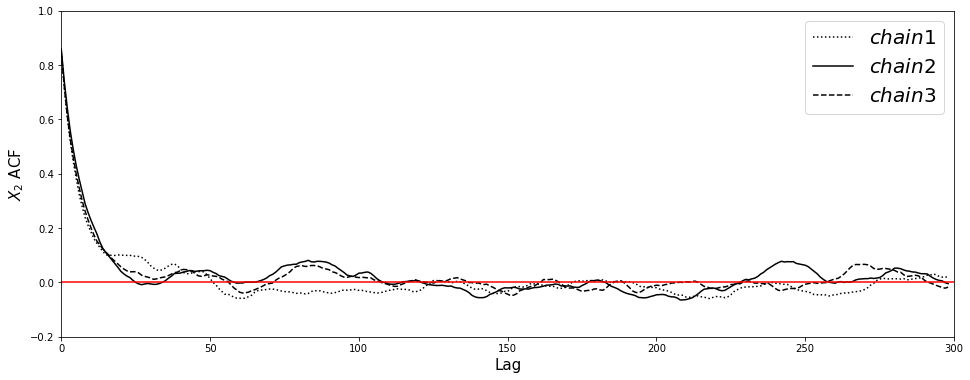

In [263]:
# https://www.google.com/search?q=autocorrelation+functions&source=lnms&tbm=isch&sa=X&ved=2ahUKEwjIi4TGjIH7AhWICBAIHUIkAWgQ_AUoAXoECAEQAw&biw=2560&bih=1304&dpr=1#imgrc=hBTIuuzgfmXfKM&imgdii=aPY-HrxoH2T05M
fig, ax = plt.subplots(1, 1, figsize = (16, 6))

ax.plot(range(299), x2_auto_var_one_chain1_book, "k:")
ax.plot(range(299), x_2_auto_variance_one_book, "k-")
ax.plot(range(299), x2_auto_var_one_chain2_book, "k--")

plt.hlines(y = 0.0, xmin = 0.0, xmax = 300, ls='-', color = "r")

ax.set_xlabel("Lag", fontsize = 15)
ax.set_ylabel("$X_2$ ACF", fontsize = 15)

ax.legend(["$chain 1$", "$chain 2$", "$chain 3$"], fontsize = 20)

ax.set_xlim(0, 300)
ax.set_ylim(-0.2, 1)

# Note that the analysis below is based on MCMC convergence checking techniques on presented in chapter 7 of [Doing Bayesian Data Analysis: A Tutorial with R, JAGS, and Stan](https://www.amazon.com/Doing-Bayesian-Data-Analysis-Tutorial/dp/0124058884/ref=sr_1_1?keywords=doing+bayesian+data+analysis&qid=1676495894&s=books&sprefix=doing+bayesian+data%2Cstripbooks-intl-ship%2C167&sr=1-1)

# MCMC Accuracy

### Autocorrelation of a chain

In [282]:
from matplotlib.patches import Rectangle
from matplotlib import patches

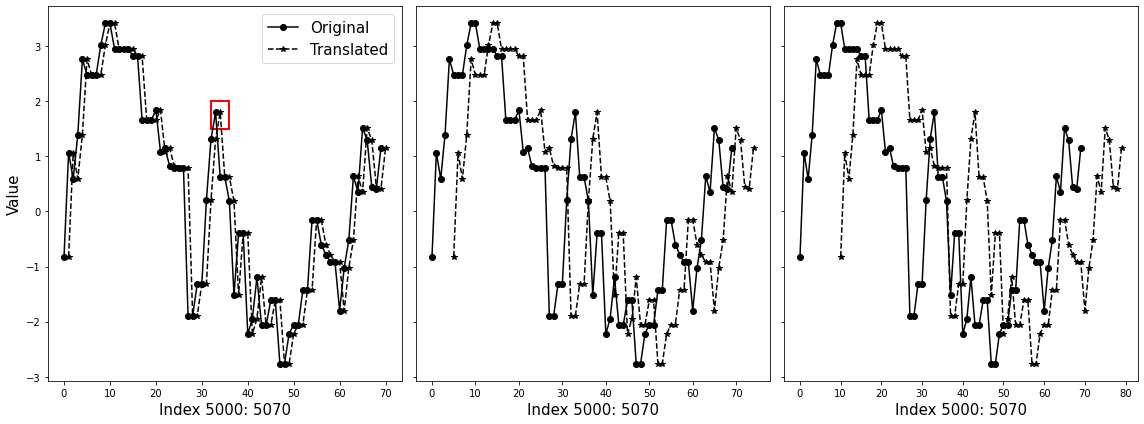

In [323]:
fig, ax = plt.subplots(1, 3, figsize = (16, 6), sharey = True)

ax[0].plot(range(70), sample_x2_variance_one[5000:5070], "k-o")
ax[0].plot(range(1, 71), sample_x2_variance_one[5000:5070], "k--*")

ax[1].plot(range(70), sample_x2_variance_one[5000:5070], "k-o")
ax[1].plot(range(5, 75), sample_x2_variance_one[5000:5070], "k--*")

ax[2].plot(range(70), sample_x2_variance_one[5000:5070], "k-o")
ax[2].plot(range(10, 80), sample_x2_variance_one[5000:5070], "k--*")

rec_patch1 = patches.Rectangle(xy = (32.0, 1.5), width = 4, height = 0.5, linewidth = 2, \
                              facecolor = "none", edgecolor = "red")

# rec_patch2 = patches.Rectangle(xy = (35.0, -1.8), width = 52.0, height = 2.0, linewidth = 1, \
#                               facecolor = "none", edgecolor = "red")

# rec_patch3 = patches.Rectangle(xy = (35.0, -1.8), width = 2.0, height = 2.0, linewidth = 1, \
#                               facecolor = "none", edgecolor = "red")

ax[0].add_patch(rec_patch1)
# ax[1].add_patch(rec_patch2)
# ax[2].add_patch(rec_patch3)


ax[0].set_xlabel("Index 5000: 5070", fontsize = 15)
ax[1].set_xlabel("Index 5000: 5070", fontsize = 15)
ax[2].set_xlabel("Index 5000: 5070", fontsize = 15)

ax[0].set_ylabel("Value", fontsize = 15)
ax[0].legend(["Original", "Translated"], fontsize = 15)

plt.tight_layout()

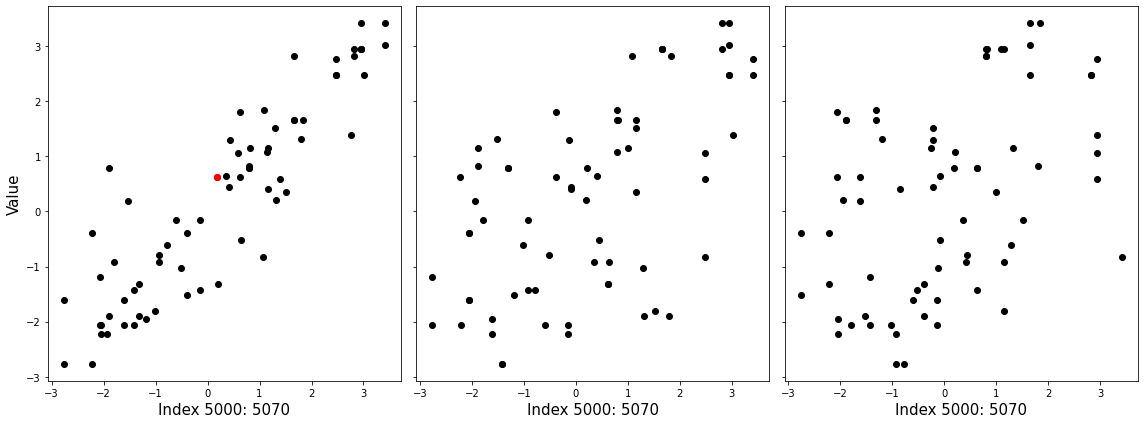

In [316]:
fig, ax = plt.subplots(1, 3, figsize = (16, 6), sharey = True)

ax[0].plot(sample_x2_variance_one[5001:5071], sample_x2_variance_one[5000:5070], "ko")

ax[1].plot(sample_x2_variance_one[5005:5075], sample_x2_variance_one[5000:5070], "ko")

ax[2].plot(sample_x2_variance_one[5010:5080], sample_x2_variance_one[5000:5070], "ko")

ax[0].plot(sample_x2_variance_one[5036:5037], sample_x2_variance_one[5035:5036], "ro")


ax[0].set_xlabel("Index 5000: 5070", fontsize = 15)
ax[1].set_xlabel("Index 5000: 5070", fontsize = 15)
ax[2].set_xlabel("Index 5000: 5070", fontsize = 15)

ax[0].set_ylabel("Value", fontsize = 15)

plt.tight_layout()

Text(0, 0.5, '$X_2$ ACF')

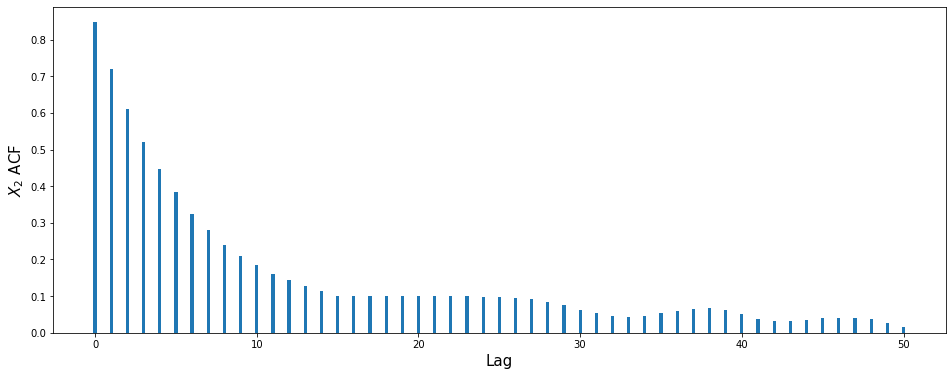

In [334]:
fig, ax = plt.subplots(1, 1, figsize = (16, 6))

rects1 = ax.bar(range(51), x2_auto_var_one_chain1_book[:51], width = 0.2)

ax.set_xlabel("Lag", fontsize = 15)
ax.set_ylabel("$X_2$ ACF", fontsize = 15)

# ax.set_xlim(-.2, 20.2)
# ax.set_ylim(-0.2, 1)

## Effective sample size (ESS)

Only for chain number 2.

In [351]:
ess_denom = 1 + 2 * sum(x2_auto_var_one_chain1_book[:42])
ess       = x2_var_one_df['chain2'].size/ess_denom
ess

505.9187207461611

## Monte Carlo standard error (MCSE)

Only for chain number 2.

In [354]:
sd   = x2_var_one_df['chain2'].std()
mcse = sd/numpy.sqrt(ess)
mcse

0.05277875690983018